<h1>Sommaire<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1.-Traitement-du-jeu-de-données" data-toc-modified-id="1.-Traitement-du-jeu-de-données-1">1. Traitement du jeu de données</a></span><ul class="toc-item"><li><span><a href="#1.1.-Choix-des-variables" data-toc-modified-id="1.1.-Choix-des-variables-1.1">1.1. Choix des variables</a></span></li><li><span><a href="#1.2.-Marché-français" data-toc-modified-id="1.2.-Marché-français-1.2">1.2. Marché français</a></span></li><li><span><a href="#1.3.-Traitement-des-valeurs-aberrantes" data-toc-modified-id="1.3.-Traitement-des-valeurs-aberrantes-1.3">1.3. Traitement des valeurs aberrantes</a></span></li><li><span><a href="#1.4.-Traitement-des-valeurs-nulles" data-toc-modified-id="1.4.-Traitement-des-valeurs-nulles-1.4">1.4. Traitement des valeurs nulles</a></span><ul class="toc-item"><li><span><a href="#1.4.1.-Produits-non-renseignés" data-toc-modified-id="1.4.1.-Produits-non-renseignés-1.4.1">1.4.1. Produits non renseignés</a></span></li><li><span><a href="#1.4.2.-Catégories-de-produits" data-toc-modified-id="1.4.2.-Catégories-de-produits-1.4.2">1.4.2. Catégories de produits</a></span></li><li><span><a href="#1.4.3.-Valeurs-nulles" data-toc-modified-id="1.4.3.-Valeurs-nulles-1.4.3">1.4.3. Valeurs nulles</a></span></li><li><span><a href="#1.4.4.-Energie" data-toc-modified-id="1.4.4.-Energie-1.4.4">1.4.4. Energie</a></span></li><li><span><a href="#1.4.5.-Nutri-Score" data-toc-modified-id="1.4.5.-Nutri-Score-1.4.5">1.4.5. Nutri-Score</a></span></li><li><span><a href="#1.4.6.-Nutri-Grade" data-toc-modified-id="1.4.6.-Nutri-Grade-1.4.6">1.4.6. Nutri-Grade</a></span></li></ul></li><li><span><a href="#1.5.-Traitement-des-doublons" data-toc-modified-id="1.5.-Traitement-des-doublons-1.5">1.5. Traitement des doublons</a></span></li></ul></li><li><span><a href="#2.-Analyse-exploratoire-des-données" data-toc-modified-id="2.-Analyse-exploratoire-des-données-2">2. Analyse exploratoire des données</a></span><ul class="toc-item"><li><span><a href="#2.1.-Analyse-univariée" data-toc-modified-id="2.1.-Analyse-univariée-2.1">2.1. Analyse univariée</a></span></li><li><span><a href="#2.2.-Analyse-bivariée" data-toc-modified-id="2.2.-Analyse-bivariée-2.2">2.2. Analyse bivariée</a></span><ul class="toc-item"><li><span><a href="#2.2.1.-Entre-variables-quantitatives" data-toc-modified-id="2.2.1.-Entre-variables-quantitatives-2.2.1">2.2.1. Entre variables quantitatives</a></span></li><li><span><a href="#2.2.2.-Variable-qualitative-vs-variable-quantitative-par-ANOVA" data-toc-modified-id="2.2.2.-Variable-qualitative-vs-variable-quantitative-par-ANOVA-2.2.2">2.2.2. Variable qualitative vs variable quantitative par ANOVA</a></span></li></ul></li><li><span><a href="#2.3.-Analyse-multivariée" data-toc-modified-id="2.3.-Analyse-multivariée-2.3">2.3. Analyse multivariée</a></span><ul class="toc-item"><li><span><a href="#2.3.1.-Liaisons-entre-les-variables" data-toc-modified-id="2.3.1.-Liaisons-entre-les-variables-2.3.1">2.3.1. Liaisons entre les variables</a></span></li><li><span><a href="#2.3.2.-Variabilité-des-individus" data-toc-modified-id="2.3.2.-Variabilité-des-individus-2.3.2">2.3.2. Variabilité des individus</a></span></li></ul></li></ul></li><li><span><a href="#3.-Rappel-sur-le-RGPD" data-toc-modified-id="3.-Rappel-sur-le-RGPD-3">3. Rappel sur le RGPD</a></span></li></ul></div>

# Préparez des données pour un organisme de santé publique

L'agence Santé publique France souhaite améliorer sa base de données Open Food Facts.

Aujourd’hui, pour ajouter un produit à la base de données d'Open Food Facts, il est nécessaire de remplir de nombreux champs textuels et numériques, ce qui peut conduire à des erreurs de saisie et à des valeurs manquantes dans la base. 

L’agence Santé publique France veut créer un système de suggestion ou d’auto-complétion pour aider les usagers à remplir plus efficacement la base de données. Dans un premier temps, il est demandé de se concentrer sur la prise en main des données, de les nettoyer et les explorer. 

Je suis missionné sur le projet de nettoyage et exploration des données en interne, afin de déterminer la faisabilité de cette idée d’application de Santé publique France.

## 1. Traitement du jeu de données

In [1]:
import matplotlib as mlp
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import sys

import matplotlib.pyplot as plt
import matplotlib.gridspec as gds

from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
print("Version de Python: {}".format(sys.version))
print("Version des librairies utilisées:")
print("Matplotlib: {}".format(mlp.__version__))
print("Numpy: {}".format(np.__version__))
print("Pandas: {}".format(pd.__version__))
print("Seaborn: {}".format(sns.__version__))
print("scikit-learn: {}".format(sklearn.__version__))

Version de Python: 3.11.4 | packaged by Anaconda, Inc. | (main, Jul  5 2023, 13:38:37) [MSC v.1916 64 bit (AMD64)]
Version des librairies utilisées:
Matplotlib: 3.7.1
Numpy: 1.24.3
Pandas: 1.5.3
Seaborn: 0.12.2
scikit-learn: 1.3.0


Je crée dans un premier temps un dataframe contenant toutes les données issues du fichier fr.openfoodfacts.org.products.csv. Il est précisé dans la documentation de ce fichier que le séparateur utilisé est la tabulation.

In [3]:
data = pd.read_csv('fr.openfoodfacts.org.products.csv', sep='\t', low_memory=False)
# first 3 rows
data.head(3)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000004530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
2,0000000004559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN


In [4]:
dimensions = data.shape
print("Le fichier est composé de {} lignes et de {} colonnes".format(dimensions[0], dimensions[1]))

Le fichier est composé de 320772 lignes et de 162 colonnes


### 1.1. Choix des variables

Le fichier contient beaucoup de données. Pour rendre le jeu plus pertinent pour la suite de l'étude, je vais réduire le nombre de variables. Pour m'aider, je vais visualiser la quantité de valeurs non nulles pour chaque variable.

In [5]:
def get_null_counts(data):
    return pd.DataFrame({
        column : { 
            'count': data[column].isna().sum(),
            'percent': 100 * data[column].isna().sum() / len(data.index),
        } for column in data.columns
    }).transpose().sort_values(by=['count']).reset_index()

In [6]:
data_null_counts = get_null_counts(data)
data_null_counts.head()

,index,count,percent
0,last_modified_t,0.0,0.000000
1,last_modified_datetime,0.0,0.000000
2,creator,2.0,0.000623
3,created_t,3.0,0.000935
4,created_datetime,9.0,0.002806


In [7]:
def get_null_barplot(data, x_size, y_size):
    sns.set(style="whitegrid")
    plt.figure(figsize=(x_size, y_size))
    plt.title("Proportion de données nulles par variable", size=15)
    sns.barplot(data=data, x="index", y="percent")
    plt.ylabel('% de valeurs nulles', fontsize=10)
    plt.xlabel('Variable', fontsize=10)
    plt.xticks(rotation=90)
    plt.show()

In [8]:
get_null_barplot(data_null_counts, 150, 100)

On peut voir qu'il y a de nombreuses variables contenant peu ou pas de données. Au lieu de supprimer ces variables et de prendre le risque de perdre des données intéressantes pour la suite, je vais me concentrer sur une variable en particulier, le Nutri-Score. 

En effet, le Nutri-Score est actuellement le plus simple indicateur pour connaître la qualité nutritionnelle d'un produit.

Selon le Règlement d’usage du Logo « Nutri-Score » du 24 avril 2023, le score nutritionnel des produits alimentaires repose sur le calcul d'un score unique et global qui prend en compte, pour chaque produit alimentaire :
- une composante “négative” N
- une composante “positive” P

Il faut distinguer les “matières grasses animales et végétales, fruits à coques et graines” et les boissons des autres produits alimentaires (des règles spécifiques s'appliquent pour les viandes et les fromages). Voici la liste des composantes N et P utilisés pour le calcul :

- Energie (KJ/100g)
- Acides gras saturés (g/100g)
- Sucres (g/100g)
- Sodium (g/100g) = sel/2.5
- Protéines (g/100g)
- Fibres (g/100g)
- Fruits, légumes, légumes secs (%)

Voici la liste des indicateurs retenus d'Open Food Facts pour la suite de l'étude :

- energy_100g
- saturated-fat_100g
- sugars_100g
- sodium_100g
- proteins_100g
- fiber_100g
- fruits-vegetables-nuts_100g

Ainsi que :
- code 
- product_name
- main_category_fr
- countries_fr
- nutrition-score-fr_100g
- nutrition_grade_fr 

Autres indicateurs retenus rentrant en compte dans le calcul de l'énergie :
- carbohydrates_100g
- alcohol_100g 

In [9]:
indicators = ['code', 'product_name', 'main_category_fr', 'countries_fr', 'nutrition-score-fr_100g', 'nutrition_grade_fr', 'energy_100g', 'carbohydrates_100g', 'sugars_100g', 'proteins_100g', 'fat_100g', 'saturated-fat_100g', 'sodium_100g', 'fiber_100g', 'fruits-vegetables-nuts_100g', 'alcohol_100g']

foods = data.loc[:, indicators]
foods.head()

,code,product_name,main_category_fr,countries_fr,nutrition-score-fr_100g,nutrition_grade_fr,energy_100g,carbohydrates_100g,sugars_100g,proteins_100g,fat_100g,saturated-fat_100g,sodium_100g,fiber_100g,fruits-vegetables-nuts_100g,alcohol_100g
0,0000000003087,Farine de blé noir,NaN,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000004530,Banana Chips Sweetened (Whole),NaN,États-Unis,14.0,d,2243.0,64.29,14.29,3.57,28.57,28.57,0.000,3.6,NaN,NaN
2,0000000004559,Peanuts,NaN,États-Unis,0.0,b,1941.0,60.71,17.86,17.86,17.86,0.00,0.250,7.1,NaN,NaN
3,0000000016087,Organic Salted Nut Mix,NaN,États-Unis,12.0,d,2540.0,17.86,3.57,17.86,57.14,5.36,0.482,7.1,NaN,NaN
4,0000000016094,Organic Polenta,NaN,États-Unis,NaN,NaN,1552.0,77.14,NaN,8.57,1.43,NaN,NaN,5.7,NaN,NaN


### 1.2. Marché français

Je vais me concentrer sur les pays commercialisés en France pour la suite de l'étude.

In [10]:
countries = foods['countries_fr'].unique().tolist()

fr_countries = []
for country in countries:
    if "France" in str(country):
        fr_countries.append(country)
              
foods = foods[foods['countries_fr'].isin(fr_countries)]
foods.head()

,code,product_name,main_category_fr,countries_fr,nutrition-score-fr_100g,nutrition_grade_fr,energy_100g,carbohydrates_100g,sugars_100g,proteins_100g,fat_100g,saturated-fat_100g,sodium_100g,fiber_100g,fruits-vegetables-nuts_100g,alcohol_100g
0,0000000003087,Farine de blé noir,NaN,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,0000000024600,Filet de bœuf,Filet-de-boeuf,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,0000000027205,NaN,NaN,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106,0000000036252,Lion Peanut x2,NaN,"France,États-Unis",22.0,e,1883.0,70.0,57.5,2.5,20.0,12.5,0.038,2.5,NaN,NaN
136,0000000039259,Twix x2,NaN,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 1.3. Traitement des valeurs aberrantes

Voyons une vue d'ensemble du jeu de données sélectionnées :

In [11]:
foods.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98440 entries, 0 to 320770
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   code                         98440 non-null  object 
 1   product_name                 91247 non-null  object 
 2   main_category_fr             61955 non-null  object 
 3   countries_fr                 98440 non-null  object 
 4   nutrition-score-fr_100g      61415 non-null  float64
 5   nutrition_grade_fr           61415 non-null  object 
 6   energy_100g                  64593 non-null  float64
 7   carbohydrates_100g           47211 non-null  float64
 8   sugars_100g                  62515 non-null  float64
 9   proteins_100g                64318 non-null  float64
 10  fat_100g                     47642 non-null  float64
 11  saturated-fat_100g           62375 non-null  float64
 12  sodium_100g                  62571 non-null  float64
 13  fiber_100g     

In [12]:
foods.describe()

,nutrition-score-fr_100g,energy_100g,carbohydrates_100g,sugars_100g,proteins_100g,fat_100g,saturated-fat_100g,sodium_100g,fiber_100g,fruits-vegetables-nuts_100g,alcohol_100g
count,61415.000000,6.459300e+04,47211.000000,62515.000000,64318.000000,47642.000000,62375.000000,62571.000000,45723.000000,2971.000000,2418.000000
mean,8.683204,1.171553e+03,27.759277,13.432792,7.754531,13.332232,5.423696,0.456924,2.559271,31.546439,9.136038
std,9.046131,1.283590e+04,27.413340,19.087618,7.887373,16.926708,8.531083,1.696759,4.634788,32.055360,10.597055
min,-15.000000,0.000000e+00,0.000000,-0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,4.270000e+02,4.000000,1.000000,1.800000,1.300000,0.300000,0.031496,0.000000,0.000000,1.000000
50%,9.000000,1.035000e+03,14.500000,4.100000,6.000000,6.800000,2.000000,0.220000,1.380000,24.000000,6.000000
75%,15.000000,1.649000e+03,53.000000,17.800000,11.000000,21.000000,7.400000,0.490000,3.200000,51.000000,12.500000
max,40.000000,3.251373e+06,190.000000,105.000000,100.000000,380.000000,210.000000,83.000000,178.000000,100.000000,69.000000


On note la présence d'outliers dans les données :
* l'énergie pour 100 g ne peut pas dépasser 3700 kJ (huile, 100% de lipides à 37 kJ le g de lipide). Ici on a 3.251373e+06 kJ,
* 190 g de glucides pour 100 g de produits,
* -0.10 ou 105 g de sucre pour 100 g de produits,
* 380 g de lipides pour 100 g de produits,
* 210 g de graisses saturées pour 100 g de produits,
* 178 g de fibres pour 100 g de produit,

Faisons un premier nettoyage selon les observations ci-dessus :

In [13]:
foods.drop(foods[foods['energy_100g'] > 3700].index, inplace = True)
foods.drop(foods[foods['carbohydrates_100g'] > 100].index, inplace = True)
foods.drop(foods[(foods['sugars_100g'] > 100) | (foods['sugars_100g'] < 0)].index, inplace = True)
foods.drop(foods[(foods['fat_100g'] > 100)].index, inplace = True)
foods.drop(foods[(foods['saturated-fat_100g'] > 100)].index, inplace = True)
foods.drop(foods[(foods['fiber_100g'] > 100)].index, inplace = True)

In [14]:
foods.describe()

,nutrition-score-fr_100g,energy_100g,carbohydrates_100g,sugars_100g,proteins_100g,fat_100g,saturated-fat_100g,sodium_100g,fiber_100g,fruits-vegetables-nuts_100g,alcohol_100g
count,61160.000000,64326.000000,47132.000000,62255.000000,64056.000000,47556.000000,62112.00000,62313.000000,45485.000000,2964.000000,2416.000000
mean,8.646403,1104.536212,27.768769,13.447144,7.772110,13.214512,5.37122,0.457707,2.561219,31.570334,9.143601
std,9.040101,762.457544,27.381955,19.069358,7.885555,16.571636,8.32967,1.699020,4.548220,32.040557,10.598178
min,-15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,425.000000,4.100000,1.000000,1.800000,1.300000,0.30000,0.031496,0.000000,0.000000,1.000000
50%,9.000000,1031.000000,14.500000,4.100000,6.000000,6.800000,1.90000,0.220472,1.400000,24.000000,6.000000
75%,15.000000,1643.000000,53.000000,17.900000,11.000000,21.000000,7.30000,0.492126,3.200000,51.050000,12.500000
max,40.000000,3700.000000,100.000000,100.000000,100.000000,100.000000,100.00000,83.000000,100.000000,100.000000,69.000000


### 1.4. Traitement des valeurs nulles

Vérifions la quantité de valeurs nulles pour chaque variable et représentons les graphiquement.

In [15]:
foods_null_counts = get_null_counts(foods)
foods_null_counts.head(15)

,index,count,percent
0,code,0.0,0.000000
1,countries_fr,0.0,0.000000
2,product_name,7189.0,7.322787
3,energy_100g,33847.0,34.476893
4,proteins_100g,34117.0,34.751918
5,sodium_100g,35860.0,36.527355
6,sugars_100g,35918.0,36.586434
7,saturated-fat_100g,36061.0,36.732095
8,main_category_fr,36326.0,37.002027
9,nutrition-score-fr_100g,37013.0,37.701812


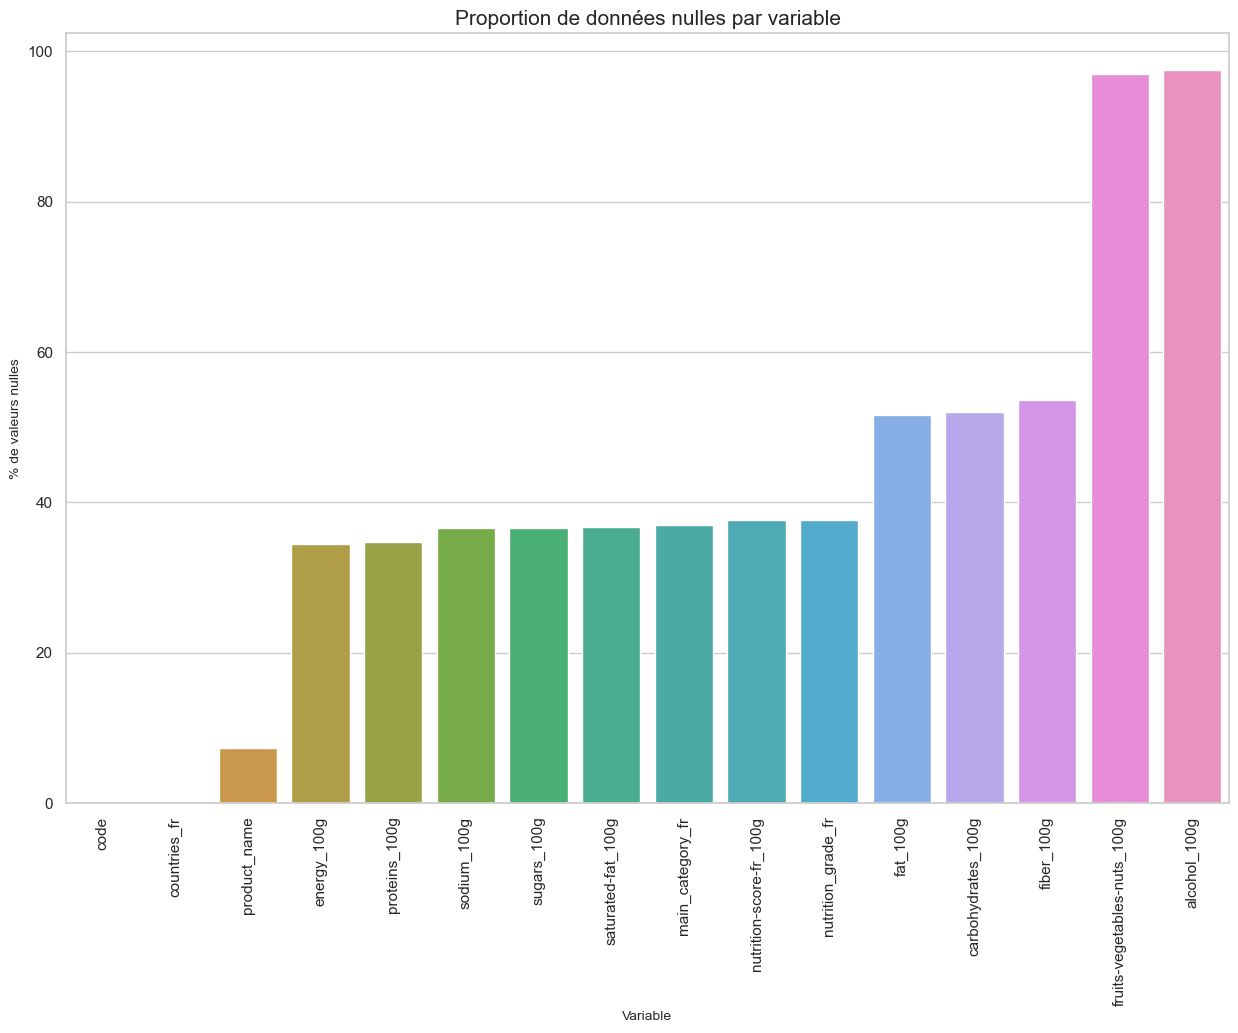

In [16]:
get_null_barplot(foods_null_counts, 15, 10)

On voit qu'il y a un peu plus de 7% de product_name non renseignés. 
Ces données manquantes ne pouvant être devinées, on peut les supprimer du jeu de données.

In [17]:
foods.dropna(subset=['product_name'], inplace=True)

Reprenons la proportion de valeurs nulles après ces premiers nettoyages

In [18]:
new_null_counts = get_null_counts(foods)
new_null_counts.head(20)

,index,count,percent
0,code,0.0,0.000000
1,product_name,0.0,0.000000
2,countries_fr,0.0,0.000000
3,energy_100g,27025.0,29.703025
4,proteins_100g,27294.0,29.998681
5,sodium_100g,29026.0,31.902312
6,sugars_100g,29084.0,31.966060
7,saturated-fat_100g,29220.0,32.115537
8,main_category_fr,29619.0,32.554075
9,nutrition-score-fr_100g,30163.0,33.151983


On retrouve beaucoup de valeurs nulles dans le jeu de données. Voila comment ces données vont être traitées:

* pour certains produits, on peut d'abord vérifier que toutes les valeurs sont remplies. Si ce n'est pas le cas, on peut supprimer la ligne du produit concerné,
* pour main_category_fr, on va vérifier la répartition des catégories de produits et remplacer les manquantes par Autre. On va également créer des top_categories pour le calcul du Nutri-Score,
* pour les indicateurs pour 100 g hors énergie et Nutri-Score, on peut remplacer les valeurs manquantes soit par la médiane par catégorie de produit, soit par 0 en concidérant que les valeurs sont non remplies car égales à 0,
* pour l'énergie et le nutrition-score-fr_100g, on peut remplacer les valeurs manquantes par leur calcul grâce aux autres valeurs retenues pour 100 g de produits,
* pour nutrition_grade_fr, on va utiliser un algorithme de machine learning de type k-NN pour remplacer les valeurs manquantes.

#### 1.4.1. Produits non renseignés

Voyons d'abord un petit aperçu du jeu de données :

In [19]:
foods.head(10)

,code,product_name,main_category_fr,countries_fr,nutrition-score-fr_100g,nutrition_grade_fr,energy_100g,carbohydrates_100g,sugars_100g,proteins_100g,fat_100g,saturated-fat_100g,sodium_100g,fiber_100g,fruits-vegetables-nuts_100g,alcohol_100g
0,0000000003087,Farine de blé noir,NaN,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,0000000024600,Filet de bœuf,Filet-de-boeuf,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106,0000000036252,Lion Peanut x2,NaN,"France,États-Unis",22.0,e,1883.0,70.00,57.5,2.50,20.00,12.5,0.038000,2.5,NaN,NaN
136,0000000039259,Twix x2,NaN,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
138,0000000039529,Pack de 2 Twix,NaN,"France,États-Unis",NaN,NaN,1481.0,77.08,NaN,6.25,4.17,NaN,NaN,6.2,NaN,NaN
182,0000005200016,lentilles vertes,Aliments et boissons à base de végétaux,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
184,0000007730009,Biscuits sablés fourrage au cacao,Sablés,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
188,0000010090206,Thé de Noël aromatisé orange-cannelle,Thés,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189,0000010127735,Sirops pour ganache macarons,Sirops,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
190,0000010187319,Mini Confettis,NaN,France,14.0,d,1753.0,NaN,87.7,0.60,NaN,0.8,0.003937,0.9,NaN,NaN


Nous voyons que pour la farine de blé noir ou le filet de boeuf par exemple, aucun autre indicateur n'est rempli. On peut supposer que c'est le cas pour d'autres produits. Supprimons ces lignes.

In [20]:
to_drop = ['energy_100g', 'carbohydrates_100g', 'sugars_100g', 'proteins_100g', 'fat_100g', 'saturated-fat_100g', 'sodium_100g', 'fiber_100g', 'fruits-vegetables-nuts_100g', 'alcohol_100g']
foods.dropna(subset=to_drop, how='all', inplace=True)

#### 1.4.2. Catégories de produits

Je vais d'abord vérifier la distribution des catégories.

In [21]:
foods.main_category_fr.value_counts()

Boissons                                            3414
Conserves                                           1784
Epicerie                                            1756
Chocolats                                           1633
Biscuits                                            1566
                                                    ... 
Cigarettes                                             1
Preparation-aux-figues-et-aux-poires                   1
Preparation-aux-fraises                                1
Preparation-aux-oranges                                1
en:Cremes-vegetales-a-base-de-coco-pour-cuisiner       1
Name: main_category_fr, Length: 1135, dtype: int64

On a 1135 catégories différentes dans nos données, or 4 grandes catégories sont prises en compte pour le calcul du nutriscore :
- matières grasses animales et végétales,
- boissons,
- fromages,
- tous les autres produits.

Il faut regrouper les produits au sein de ces 4 catégories dans un top_category.
On remplace d'abord les NaN de main_category_fr par "Autre". Cela servira aux calculs de médianes pour le remplacement des valeurs manquantes en nutriments.

In [22]:
foods['main_category_fr'] = foods['main_category_fr'].fillna('Autres')

Un coup d'oeil rapide aux différentes main_category_fr a permis de mettre en avant certains mots clés mieux représentées que les autres pour regrouper les main_category_fr.

In [23]:
main_category_fr = foods['main_category_fr'].unique().tolist()

list_of_beverages = ['Boisson', 'Jus', 'Soda', 'Nectar', 'Sirop', 'Thé', 'Café', 'Infusion', 'Vin', 'Aoc', 'Igp', 'Alcool', 'Eaux']
beverages = []
list_of_cheeses = ['Fromage', 'Emmental']
cheeses = []
list_of_fats = ['Crème', 'Huile', 'Beurre', 'Mayonnaise', 'Matières grasses']
fats = []
list_of_others = ['Autres', 'Conserves', 'Epicerie', 'Chocolats', 'Biscuits', 'Plats préparés', 'Surgelés', 'Petit-déjeuners', 'Desserts', 'Plats à base de viande']
others = []
for cat in main_category_fr:
    if any(substring in str(cat) for substring in list_of_beverages):
        beverages.append(cat)
    if any(substring in str(cat) for substring in list_of_cheeses):
        cheeses.append(cat)
    if any(substring in str(cat) for substring in list_of_fats):
        fats.append(cat)
    if any(substring in str(cat) for substring in list_of_others):
        others.append(cat)

In [24]:
# create top_categorie column
foods["top_category"] = np.nan

In [25]:
foods['top_category'].mask(foods['main_category_fr'].isin(beverages), 'Boissons', inplace=True)
foods['top_category'].mask(foods['main_category_fr'].isin(cheeses), 'Fromages', inplace=True)
foods['top_category'].mask(foods['main_category_fr'].isin(fats), 'Matières grasses', inplace=True)
foods['top_category'].mask(foods['main_category_fr'].isin(others), 'Produits alimentaires', inplace=True)
foods['top_category'] = foods['top_category'].fillna('Produits alimentaires')

#### 1.4.3. Valeurs nulles

Pour les carbohydrates_100g, si on connait les valeurs en sugars_100g on peut remplacer les NaN des carbohydrates_100g par les valeurs de sugars_100g. Il ne peut pas y avoir moins de glucides totaux que de sucres.
Même chose pour les fat_100g avec les saturated-fat_100g.

In [26]:
foods['carbohydrates_100g'] = foods['carbohydrates_100g'].fillna(foods['sugars_100g'])
foods['fat_100g'] = foods['fat_100g'].fillna(foods['saturated-fat_100g'])

Pour les autres variables et les glucides et lipides n'ayant pas pu être remplacés, on remplace les NaN par la médiane de chaque variable par catégories (main_category_fr) de produit.

In [27]:
nutriments = ['carbohydrates_100g', 'sugars_100g', 'proteins_100g', 'fat_100g', 'saturated-fat_100g', 'sodium_100g', 'fiber_100g', 'fruits-vegetables-nuts_100g', 'alcohol_100g']
for n in nutriments:
    foods[n] = foods[n].fillna(foods.groupby('main_category_fr')[n].transform('median'))

Pour les NaN encore restant, on les remplace par des 0. On estime que ces valeurs n'ont pas été renseignées car elles ne sont pas quantifiées.

In [28]:
foods[nutriments] = foods[nutriments].fillna(0)

#### 1.4.4. Energie

Prenons le produit herbalife frullato en exemple :

In [29]:
foods.loc[foods['product_name'] == 'herbalife frullato']

,code,product_name,main_category_fr,countries_fr,nutrition-score-fr_100g,nutrition_grade_fr,energy_100g,carbohydrates_100g,sugars_100g,proteins_100g,fat_100g,saturated-fat_100g,sodium_100g,fiber_100g,fruits-vegetables-nuts_100g,alcohol_100g,top_category
111648,0146,herbalife frullato,Autres,"France,Italie",NaN,NaN,NaN,8.4,4.6,7.0,2.6,2.0,0.208661,0.2,0.0,0.0,Produits alimentaires


Je remplace les valeurs nulles par le calcul de l'énergie en kJ grâce aux quantités de carbohydrates_100g, proteins_100g, fat_100g et alcohol_100g.

In [30]:
foods['energy_100g'] = foods['energy_100g'].fillna((foods['carbohydrates_100g']*17)+(foods['proteins_100g']*17)+(foods['fat_100g']*37)+(foods['alcohol_100g']*29))

In [31]:
foods.loc[foods['product_name'] == 'herbalife frullato']

,code,product_name,main_category_fr,countries_fr,nutrition-score-fr_100g,nutrition_grade_fr,energy_100g,carbohydrates_100g,sugars_100g,proteins_100g,fat_100g,saturated-fat_100g,sodium_100g,fiber_100g,fruits-vegetables-nuts_100g,alcohol_100g,top_category
111648,0146,herbalife frullato,Autres,"France,Italie",NaN,NaN,358.0,8.4,4.6,7.0,2.6,2.0,0.208661,0.2,0.0,0.0,Produits alimentaires


La valeur en calories a bien été calculée.

Vérifions maintenant si vous avons des valeurs en calories à 0 alors qu'il y a d'autres nutriments présents.

In [32]:
foods.loc[foods['energy_100g'] == 0].head()

,code,product_name,main_category_fr,countries_fr,nutrition-score-fr_100g,nutrition_grade_fr,energy_100g,carbohydrates_100g,sugars_100g,proteins_100g,fat_100g,saturated-fat_100g,sodium_100g,fiber_100g,fruits-vegetables-nuts_100g,alcohol_100g,top_category
886,00088978,Fresh Drinking Coconut,Boissons,"France,Royaume-Uni",0.0,b,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,13.0,9.0,Boissons
6570,0011152010908,Algues Wakame Pour Soupe Ou Salade WEL-PAC 56.7G,Autres,"France,États-Unis",5.0,c,0.0,40.0,0.0,20.0,0.0,1.0,9.448819,0.0,0.0,0.0,Produits alimentaires
43001,0041278000057,Mixes up salt,Autres,"France,États-Unis",NaN,NaN,0.0,0.0,4.6,0.0,0.0,2.0,33.750000,0.2,0.0,0.0,Produits alimentaires
59742,0049000027624,Dasani Purified Water,Eaux,France,0.0,b,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,10.0,0.0,Boissons
60623,0049283802185,S.Pellegrino,Eaux,"France,États-Unis",0.0,a,0.0,0.0,0.0,0.0,0.0,0.0,0.004220,0.0,10.0,0.0,Boissons


On voit pour le produit Algues Wakame Pour Soupe Ou Salade WEL-PAC 56.7G que l'énergie est à 0 alors que le produit contient des glucides et des protéines.
Je remplace ces 0 par des valeurs calculées.

In [33]:
foods['energy_100g'] = np.where((foods['energy_100g'] == 0) & ((foods['carbohydrates_100g'] > 0) | (foods['proteins_100g'] > 0) | (foods['fat_100g'] > 0) | (foods['alcohol_100g'] > 0)), ((foods['carbohydrates_100g']*17)+(foods['proteins_100g']*17)+(foods['fat_100g']*37)+(foods['alcohol_100g']*29)), foods['energy_100g'])

In [34]:
foods.loc[foods['product_name'] == 'Algues Wakame Pour Soupe Ou Salade WEL-PAC 56.7G']

,code,product_name,main_category_fr,countries_fr,nutrition-score-fr_100g,nutrition_grade_fr,energy_100g,carbohydrates_100g,sugars_100g,proteins_100g,fat_100g,saturated-fat_100g,sodium_100g,fiber_100g,fruits-vegetables-nuts_100g,alcohol_100g,top_category
6570,0011152010908,Algues Wakame Pour Soupe Ou Salade WEL-PAC 56.7G,Autres,"France,États-Unis",5.0,c,1020.0,40.0,0.0,20.0,0.0,1.0,9.448819,0.0,0.0,0.0,Produits alimentaires


#### 1.4.5. Nutri-Score

Je vais calculer les valeurs manquantes du Nutri-Score.

In [35]:
def get_nutriscore(row):
    if row['top_category'] in ['Fromages', 'Produits alimentaires']:
        energy_score = int(row['energy_100g']/335)
        sugars_score = int(row['sugars_100g']/4.5)
        saturated_fat_score = int(row['saturated-fat_100g'])
        sodium_score = int(row['sodium_100g']/90)
        negative_score = energy_score + sugars_score + saturated_fat_score + sodium_score
        
        proteins_score = int(row['proteins_100g']/1.6)
        fiber_score = int(row['fiber_100g']/0.9)
        if row['fruits-vegetables-nuts_100g'] <= 40:
            fvn_score = 0
        elif row['fruits-vegetables-nuts_100g'] > 40 and row['fruits-vegetables-nuts_100g'] <= 60:
            fvn_score = 1
        elif row['fruits-vegetables-nuts_100g'] > 60 and row['fruits-vegetables-nuts_100g'] < 80:
            fvn_score = 2
        elif row['fruits-vegetables-nuts_100g'] >= 80:
            fvn_score = 5
        positive_score = proteins_score + fiber_score + fvn_score
        
        if negative_score < 11 or row['top_category'] == ['Fromages']:
            nutri_score = negative_score - positive_score
        elif negative_score >= 11:
            if fvn_score == 5:
                nutri_score = negative_score - positive_score
            else:
                nutri_score = negative_score - fiber_score - fvn_score
                
    elif row['top_category'] == 'Matières grasses':
        if int(row['fat_100g']) == 0:
            ratio = 0
        else:
            ratio = int(row['saturated-fat_100g']) / int(row['fat_100g'])
        
        if ratio < 10:
            nutri_score = 0
        elif ratio < 16:
            nutri_score = 1
        elif ratio < 22:
            nutri_score = 2
        elif ratio < 28:
            nutri_score = 3
        elif ratio < 34:
            nutri_score = 4
        elif ratio < 40:
            nutri_score = 5
        elif ratio < 46:
            nutri_score = 6
        elif ratio < 52:
            nutri_score = 7
        elif ratio < 58:
            nutri_score = 8
        elif ratio < 64:
            nutri_score = 9
        elif ratio >= 64:
            nutri_score = 10
            
    elif row['top_category'] == 'Boissons':
        energy_score = int(row['energy_100g']/30)
        sugars_score = int(row['sugars_100g']/1.5)
        if row['fruits-vegetables-nuts_100g'] <= 40:
            fvn_score = 0
        elif row['fruits-vegetables-nuts_100g'] > 40 and row['fruits-vegetables-nuts_100g'] <= 60:
            fvn_score = 2
        elif row['fruits-vegetables-nuts_100g'] > 60 and row['fruits-vegetables-nuts_100g'] <= 80:
            fvn_score = 4
        elif row['fruits-vegetables-nuts_100g'] > 80:
            fvn_score = 10
            
        nutri_score = (energy_score+sugars_score) - fvn_score
        
    return nutri_score

In [36]:
# new column calculated_nutriscore 
foods['calculated_nutriscore'] = foods.apply(lambda row: get_nutriscore(row), axis=1)

In [37]:
# replace NaN values in nutrition-score-fr_100g with calculated_nutriscore
foods['nutrition-score-fr_100g'] = foods['nutrition-score-fr_100g'].fillna(foods['calculated_nutriscore'])

Vérifions que de nouvelles valeurs aberrantes ne se soient pas glissées dans le Nutri-Score à la suite du calcul :

In [38]:
foods.describe()

,nutrition-score-fr_100g,energy_100g,carbohydrates_100g,sugars_100g,proteins_100g,fat_100g,saturated-fat_100g,sodium_100g,fiber_100g,fruits-vegetables-nuts_100g,alcohol_100g,calculated_nutriscore
count,66380.000000,66380.000000,66380.000000,66380.000000,66380.000000,66380.000000,66380.000000,66380.000000,66380.000000,66380.000000,66380.000000,66380.000000
mean,8.712308,1089.479826,23.763367,13.080143,7.608574,10.858324,5.218801,0.442534,2.111976,15.199612,0.634152,5.821648
std,9.724955,758.725352,26.129896,18.745668,7.901148,15.245076,8.267352,1.682150,3.911940,27.885301,3.029524,14.971256
min,-66.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-173.000000
25%,1.000000,414.166500,2.700000,1.000000,1.500000,0.500000,0.200000,0.019685,0.000000,0.000000,0.000000,-3.000000
50%,9.000000,1011.500000,11.000000,4.200000,5.900000,4.200000,1.800000,0.200787,1.000000,0.000000,0.000000,2.000000
75%,16.000000,1628.000000,46.000000,16.000000,10.700000,16.200000,7.000000,0.472441,2.900000,13.000000,0.000000,14.000000
max,116.000000,3700.000000,100.000000,100.000000,100.000000,100.000000,100.000000,83.000000,100.000000,100.000000,69.000000,118.000000


On voit un -66 en minimum et 114 en maximum. Il s'agit de valeurs aberrantes, supprimons les. Pour rappel, le maximum en Nutri-Score est de 40 et le minimum de -15.

In [39]:
foods.drop(foods[(foods['nutrition-score-fr_100g'] > 40) | (foods['nutrition-score-fr_100g'] < -15)].index, inplace = True)

Je supprime aussi la colonne 'calculated_nutriscore' qui ne me sert plus pour la suite.

In [40]:
foods.drop(['calculated_nutriscore'], axis=1, inplace = True)

#### 1.4.6. Nutri-Grade

Il s'agit de la lettre allant de A à E.
J'utilise un algorithme de machine learning de type k-NN pour remplacer les valeurs manquantes en me basant sur les valeurs du Nutri-Score.

On sépare le dataframe foods en 2 selon qu'il contient ou non NaN dans la colonne nutrition_grade_fr.

In [41]:
foods_copy = foods.copy()

In [42]:
foods_with_nan = foods_copy[foods_copy['nutrition_grade_fr'].isna()]
foods_with_nan.head()

,code,product_name,main_category_fr,countries_fr,nutrition-score-fr_100g,nutrition_grade_fr,energy_100g,carbohydrates_100g,sugars_100g,proteins_100g,fat_100g,saturated-fat_100g,sodium_100g,fiber_100g,fruits-vegetables-nuts_100g,alcohol_100g,top_category
138,0000000039529,Pack de 2 Twix,Autres,"France,États-Unis",-2.0,NaN,1481.0,77.08,4.60,6.25,4.17,2.0,0.208661,6.2,0.0,0.0,Produits alimentaires
774,0008295616241,Balsamic vinegar of Modena,it:Vinaigre-balsamique,France,4.0,NaN,63.0,3.00,3.00,0.00,0.00,0.0,0.000000,0.0,0.0,0.0,Boissons
11100,0013935620236,Boisson au soja,Boissons,France,12.0,NaN,235.2,10.20,8.20,2.00,0.80,0.0,0.034000,0.0,13.0,9.0,Boissons
11299,0014113230018,Almonds,Fruits à coques,France,-15.0,NaN,2406.0,21.70,3.90,21.20,49.40,3.7,0.120079,7.0,100.0,0.0,Produits alimentaires
11745,0014816001007,Vinaigre basalmique bio,Vinaigres,France,24.0,NaN,444.9,27.20,15.15,0.70,0.00,0.0,0.011811,0.0,0.0,6.0,Boissons


In [43]:
foods_without_nan = foods_copy[~foods_copy['nutrition_grade_fr'].isna()]

In [44]:
x = foods_without_nan[['nutrition-score-fr_100g']]
y = foods_without_nan['nutrition_grade_fr']
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8)

In [45]:
knn = neighbors.KNeighborsClassifier(n_neighbors=4)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=4)

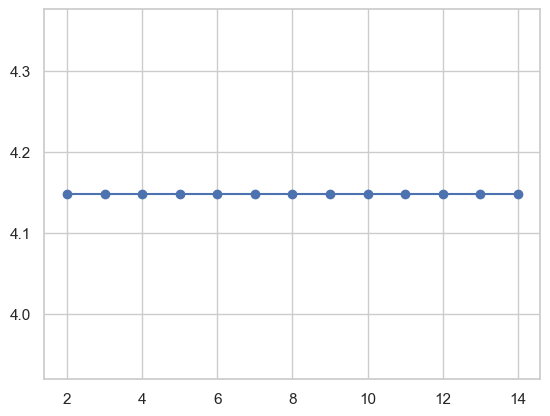

In [46]:
# show predict errors depending on k value
errors = []
for k in range(2,15):
    knn = neighbors.KNeighborsClassifier(k)
    errors.append(100*(1 - knn.fit(x_train, y_train).score(x_test, y_test)))
plt.plot(range(2,15), errors, 'o-')
plt.show()

In [47]:
knn.score(x_test,y_test)

0.9585219323512468

Préparation des données et prédiction des valeurs nulles pour le Nutri-Score.

In [48]:
foods_with_nan.reset_index()
foods_to_predict = foods_with_nan[['nutrition-score-fr_100g']]
predicted = knn.predict(foods_to_predict)

In [49]:
nutri_index = foods_with_nan.columns.get_loc('nutrition_grade_fr')

for index, value in enumerate(predicted):
    foods_with_nan.iloc[index, nutri_index] = value

Création du DataFrame final ne contenant plus aucune valeur nulle.

In [50]:
final_foods = pd.concat([foods_with_nan, foods_without_nan])

In [51]:
final_foods.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66108 entries, 138 to 320763
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   code                         66108 non-null  object 
 1   product_name                 66108 non-null  object 
 2   main_category_fr             66108 non-null  object 
 3   countries_fr                 66108 non-null  object 
 4   nutrition-score-fr_100g      66108 non-null  float64
 5   nutrition_grade_fr           66108 non-null  object 
 6   energy_100g                  66108 non-null  float64
 7   carbohydrates_100g           66108 non-null  float64
 8   sugars_100g                  66108 non-null  float64
 9   proteins_100g                66108 non-null  float64
 10  fat_100g                     66108 non-null  float64
 11  saturated-fat_100g           66108 non-null  float64
 12  sodium_100g                  66108 non-null  float64
 13  fiber_100g   

Il n'a plus une seule valeurs nulle dans notre jeu de données.

### 1.5. Traitement des doublons

On va maintenant vérifier la présence de valeurs dupliquées.
Les codes produits doivent être uniques. Vérifions si des doublons sont présents.

In [52]:
duplicates = final_foods[final_foods.duplicated(['code'], keep=False)]
print("Nombre de doublons sur le code produits : {}".format(duplicates.shape[0]))

Nombre de doublons sur le code produits : 0


Il n'y a pas de doublon sur le code produit. Le dataframe final_foods va être utilisé pour l'analyse exploraroire des données.

## 2. Analyse exploratoire des données

### 2.1. Analyse univariée

In [53]:
final_foods.head()

,code,product_name,main_category_fr,countries_fr,nutrition-score-fr_100g,nutrition_grade_fr,energy_100g,carbohydrates_100g,sugars_100g,proteins_100g,fat_100g,saturated-fat_100g,sodium_100g,fiber_100g,fruits-vegetables-nuts_100g,alcohol_100g,top_category
138,0000000039529,Pack de 2 Twix,Autres,"France,États-Unis",-2.0,a,1481.0,77.08,4.60,6.25,4.17,2.0,0.208661,6.2,0.0,0.0,Produits alimentaires
774,0008295616241,Balsamic vinegar of Modena,it:Vinaigre-balsamique,France,4.0,c,63.0,3.00,3.00,0.00,0.00,0.0,0.000000,0.0,0.0,0.0,Boissons
11100,0013935620236,Boisson au soja,Boissons,France,12.0,d,235.2,10.20,8.20,2.00,0.80,0.0,0.034000,0.0,13.0,9.0,Boissons
11299,0014113230018,Almonds,Fruits à coques,France,-15.0,a,2406.0,21.70,3.90,21.20,49.40,3.7,0.120079,7.0,100.0,0.0,Produits alimentaires
11745,0014816001007,Vinaigre basalmique bio,Vinaigres,France,24.0,e,444.9,27.20,15.15,0.70,0.00,0.0,0.011811,0.0,0.0,6.0,Boissons


In [54]:
final_foods.describe()

,nutrition-score-fr_100g,energy_100g,carbohydrates_100g,sugars_100g,proteins_100g,fat_100g,saturated-fat_100g,sodium_100g,fiber_100g,fruits-vegetables-nuts_100g,alcohol_100g
count,66108.000000,66108.000000,66108.000000,66108.000000,66108.000000,66108.000000,66108.000000,66108.000000,66108.000000,66108.000000,66108.000000
mean,8.603528,1088.425712,23.764453,13.077996,7.609751,10.889559,5.237679,0.443472,2.106710,15.201531,0.532311
std,9.272351,759.848147,26.125281,18.735648,7.853708,15.256285,8.276409,1.684718,3.879714,27.922758,2.267309
min,-15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,414.000000,2.700000,1.000000,1.500000,0.500000,0.200000,0.020000,0.000000,0.000000,0.000000
50%,9.000000,1008.000000,11.100000,4.200000,5.900000,4.200000,1.800000,0.205000,1.100000,0.000000,0.000000
75%,16.000000,1628.000000,46.000000,16.100000,10.700000,16.300000,7.000000,0.472441,2.900000,13.000000,0.000000
max,40.000000,3700.000000,100.000000,100.000000,100.000000,100.000000,100.000000,83.000000,100.000000,100.000000,55.000000


Voyons graphiquement ce que cela représente.

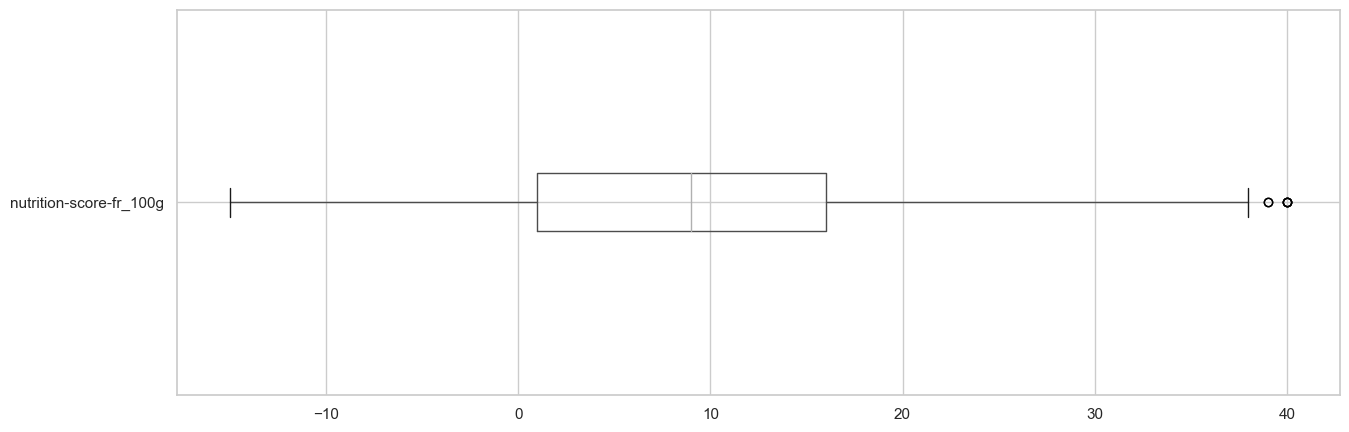

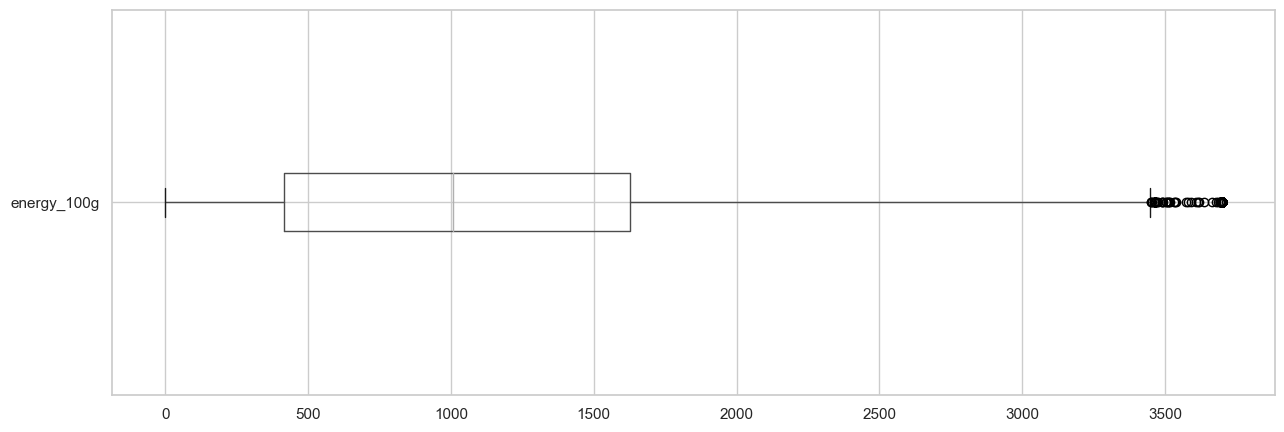

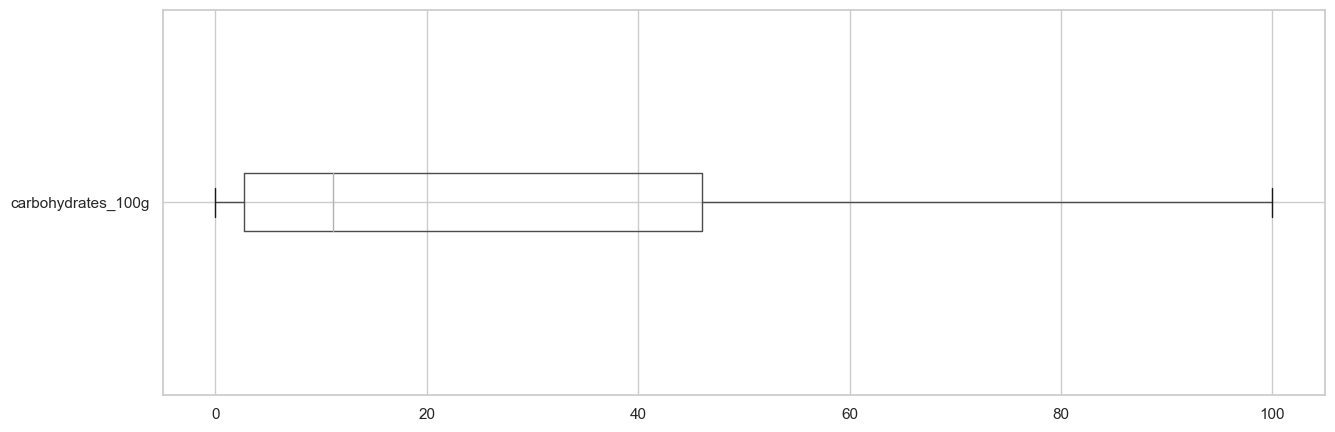

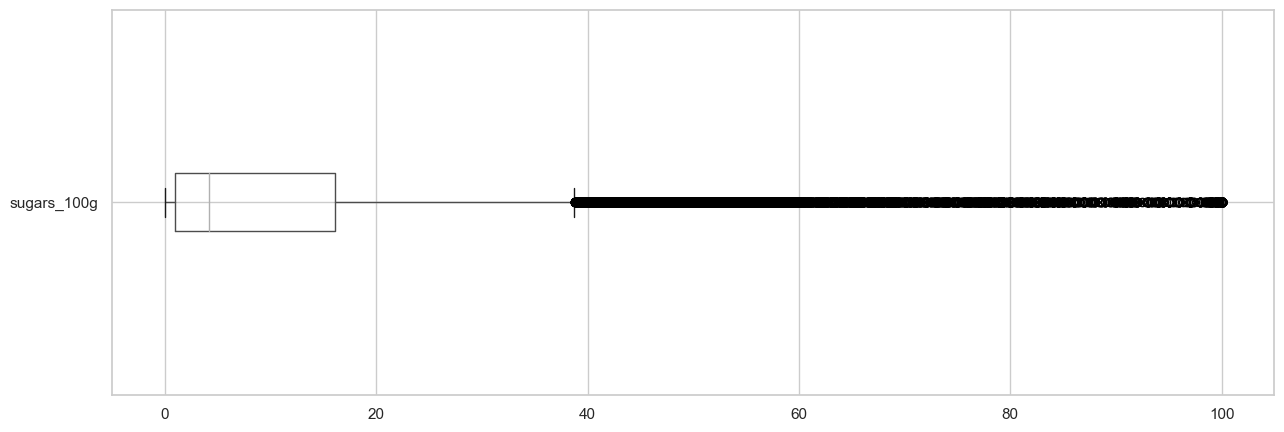

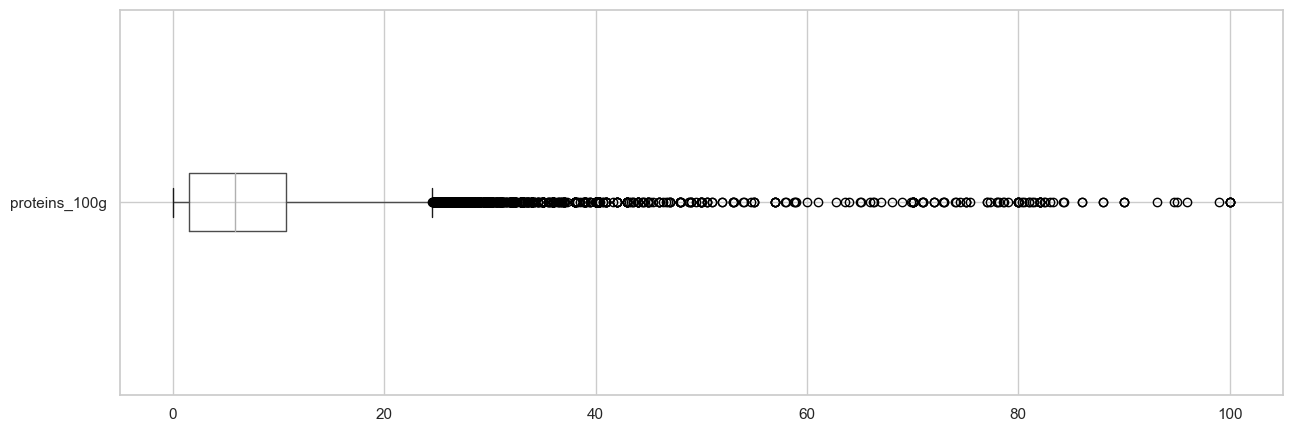

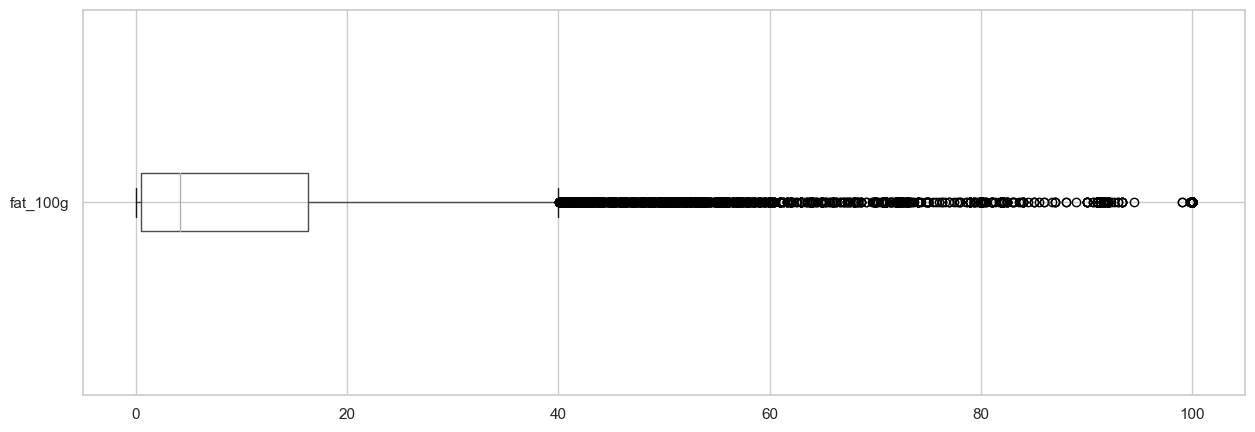

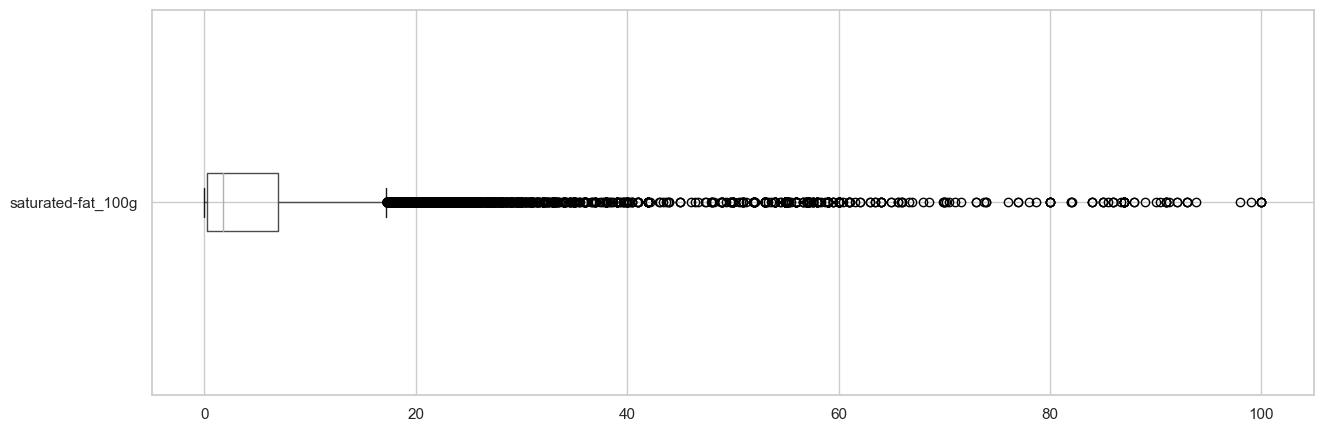

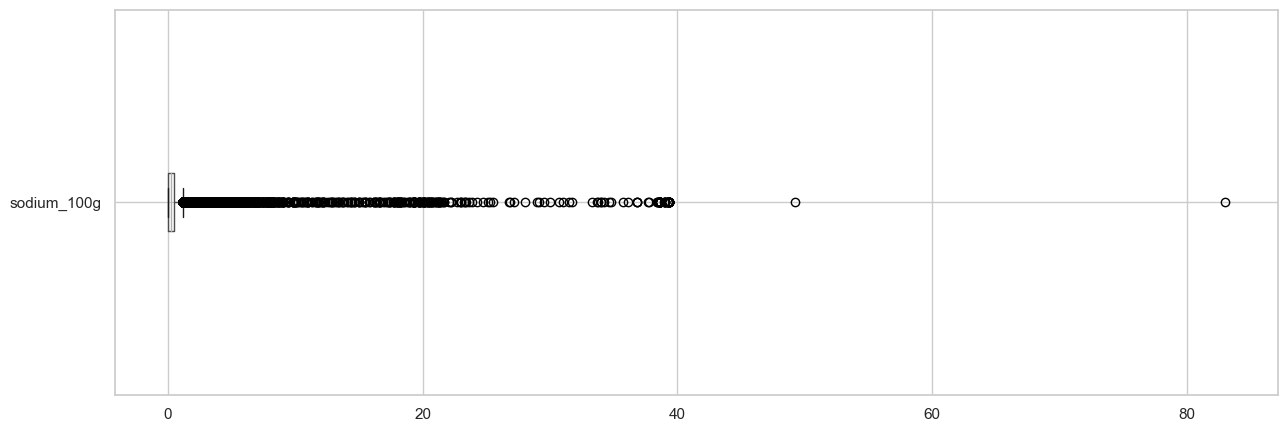

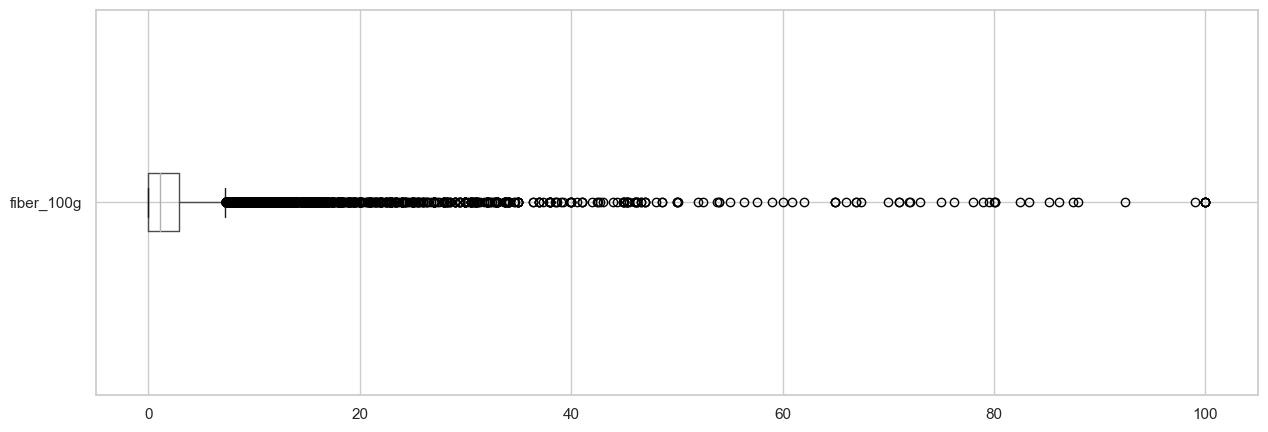

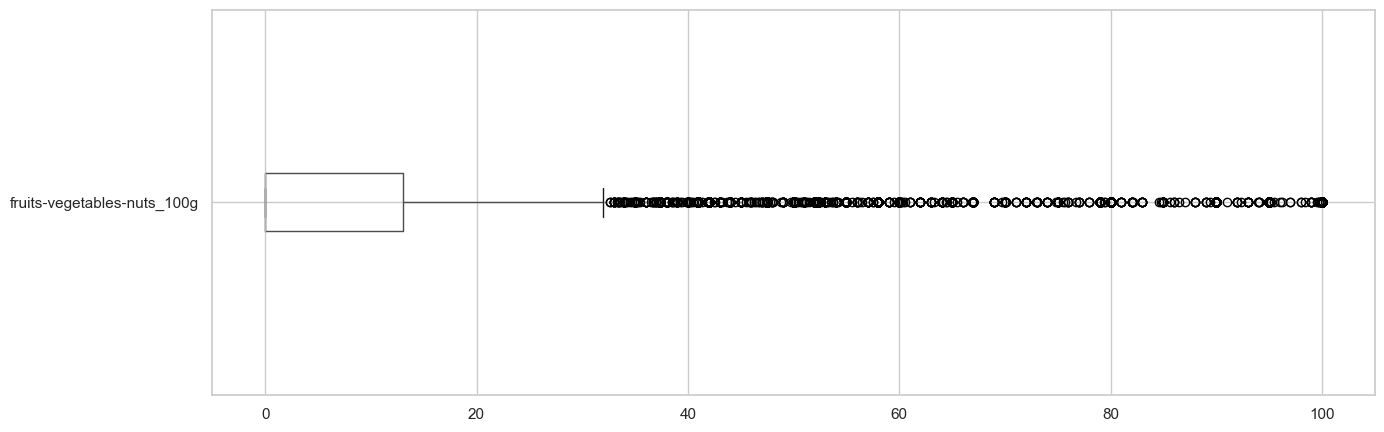

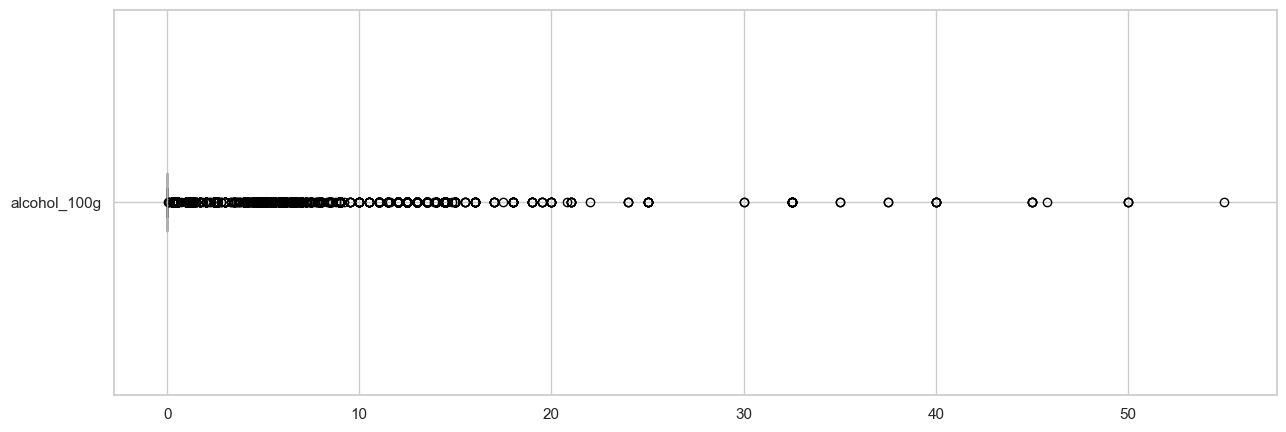

In [55]:
variables = ['nutrition-score-fr_100g', 'energy_100g', 'carbohydrates_100g', 'sugars_100g', 'proteins_100g', 'fat_100g', 'saturated-fat_100g', 'sodium_100g', 'fiber_100g', 'fruits-vegetables-nuts_100g', 'alcohol_100g']
for v in variables:
    final_foods.boxplot(column=v, vert=False, figsize=(15,5))
    plt.show()

<div class="alert alert-block alert-warning"> Pour rappel, les quantiles sont les valeurs qui partagent la population n en parts égales. </div>

On remarque pour certaines variables des valeurs au delà de la moustache. Dans notre cas ce ne sont pas des valeurs aberrantes mais des valeurs atypiques. Par exemple :

In [56]:
final_foods.loc[final_foods['sugars_100g'] == 100, ['product_name']]

,product_name
12780,C&H Cane Sugar
192173,Sucre semoule fine
248704,Sucre blanc en poudre
179053,Sucres en morceaux
180801,Granulated Sugar
...,...
307446,Sucre en poudre
311403,Sucre roux de canne
312168,Sucre blanc
315139,Morceaux de sucre N°4


Si on regarde un petit échantillon de produits étant composés de 100% de sucre, on voit qu'il s'agit majoritairement de sucre et de confiseries. Donc rien d'étonnant à ce que ces produits soient composés à 100% de sucre. Ce sont donc bien des valeurs atypiques.

Voyons maintenant comment sont répartis les Nutri-Grades entre tous les produits.

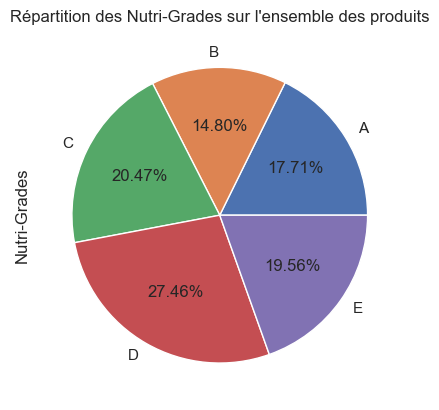

In [57]:
labels = ["A", "B", "C", "D", "E"]
final_foods['nutrition_grade_fr'].value_counts(normalize=True).sort_index().plot(kind='pie', labels=labels, autopct='%.2f%%')
plt.title("Répartition des Nutri-Grades sur l'ensemble des produits")
plt.ylabel("Nutri-Grades")
plt.show()

On a quasiment autant de "bons" produits (avec un Nutri-Score de A à C) que de "mauvais" produits (avec un Nutri-Score de D et E).

Voyons maintenant comment se répartissent les nutriments sur l'ensemble des produits.

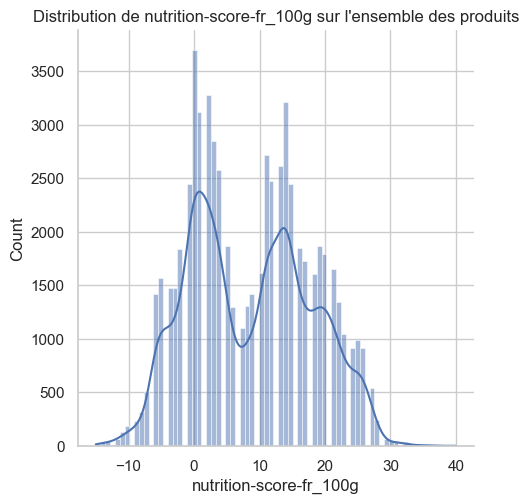

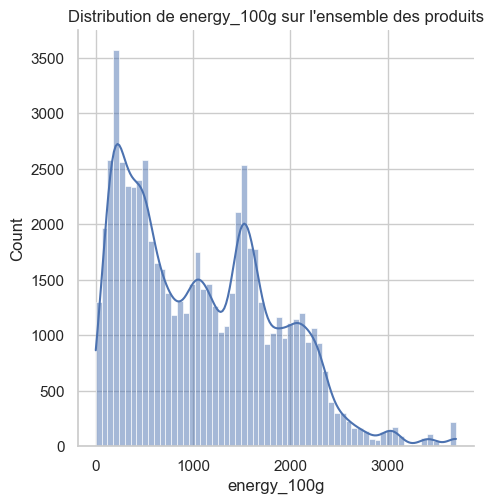

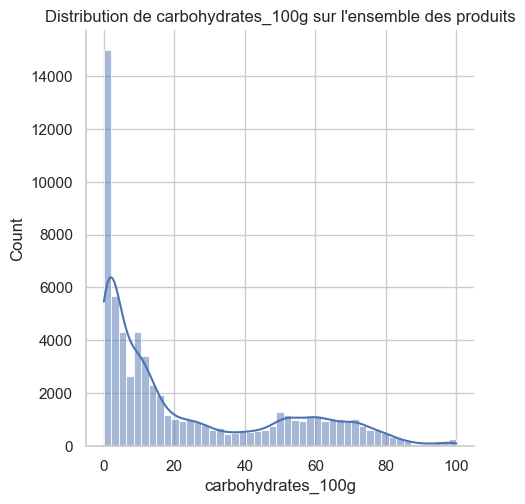

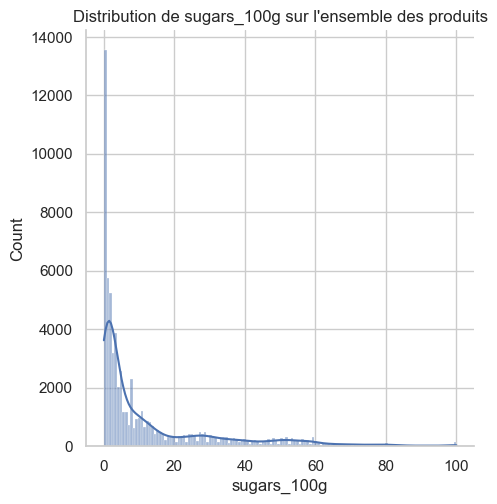

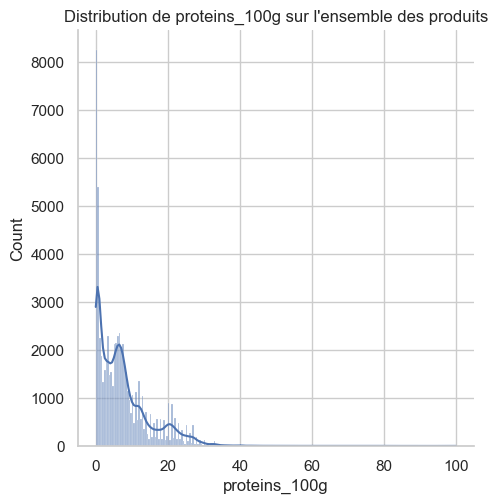

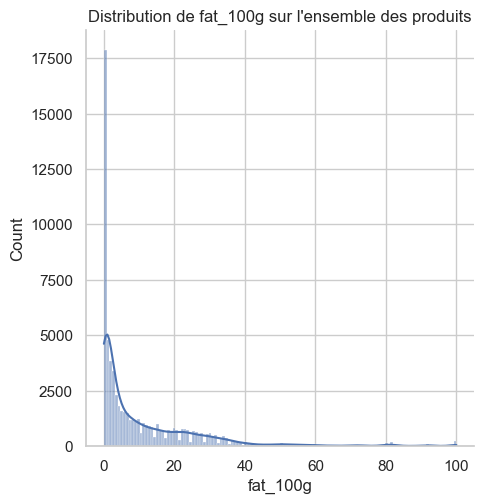

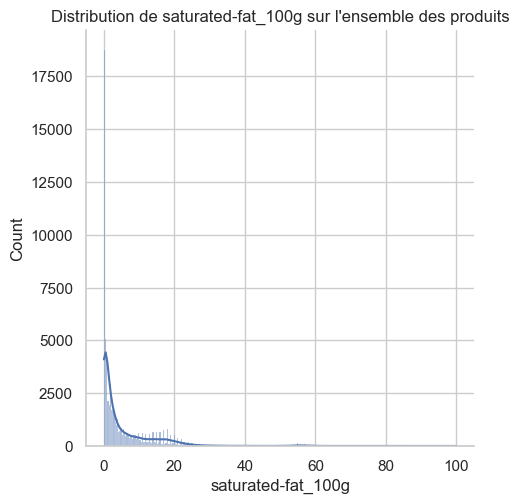

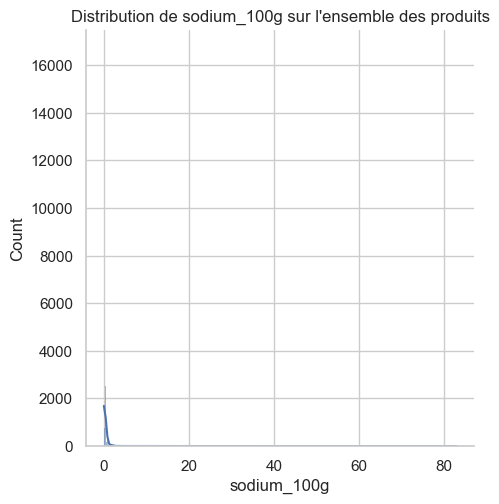

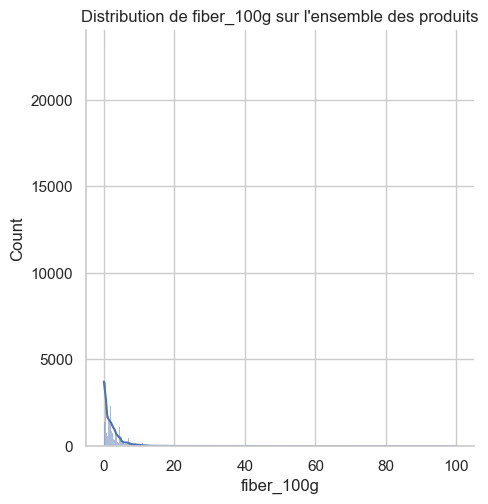

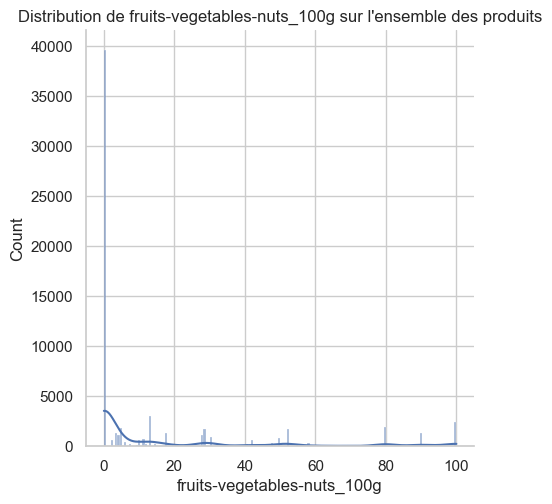

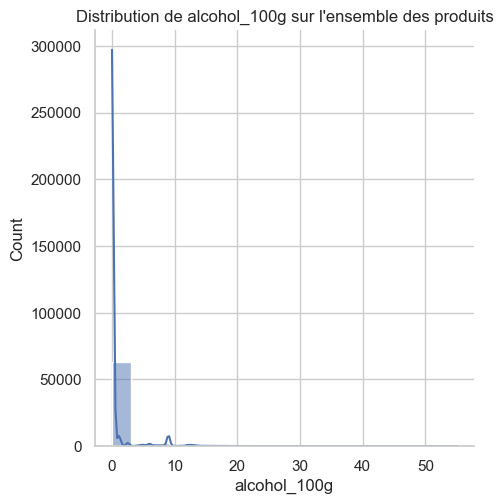

In [58]:
for v in variables:
    sns.displot(final_foods[v], kde = True)
    plt.title("Distribution de {} sur l'ensemble des produits".format(v))
    plt.show()

### 2.2. Analyse bivariée

#### 2.2.1. Entre variables quantitatives

Voyons en premier lieu si il y a une corrélation entre la composition d'un produit en lipides totaux et en graisses saturées.

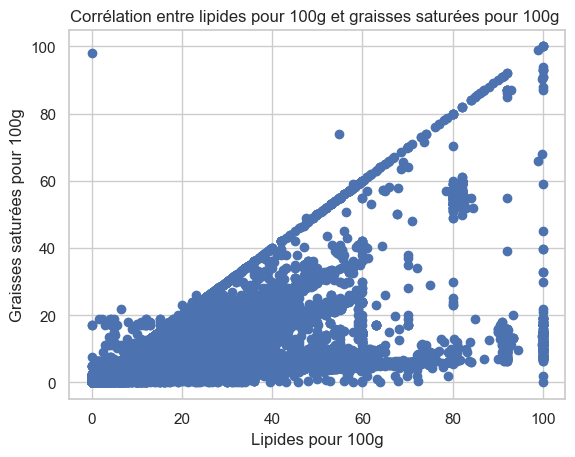

In [59]:
plt.plot(final_foods["fat_100g"],final_foods["saturated-fat_100g"],'o')
plt.title("Corrélation entre lipides pour 100g et graisses saturées pour 100g ")
plt.xlabel("Lipides pour 100g")
plt.ylabel("Graisses saturées pour 100g")
plt.show()

On voit que plus un produit contient de lipides plus celui-ci est susceptible de contenir des graisses saturées. Mais un produit contenant 100% de lipides peut ne pas contenir de graisses saturées.

Voyons aussi si il y a une corrélation entre la composition d'un produit en glucides totaux et en sucres.

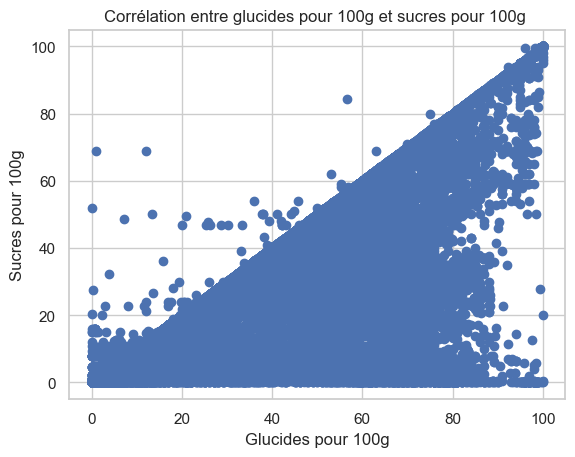

In [60]:
plt.plot(final_foods["carbohydrates_100g"],final_foods["sugars_100g"],'o')
plt.title("Corrélation entre glucides pour 100g et sucres pour 100g ")
plt.xlabel("Glucides pour 100g")
plt.ylabel("Sucres pour 100g")
plt.show()

Même chose ici. On voit que plus un produit contient de glucides plus celui-ci est susceptible de contenir des sucres. Mais un produit contenant 100% de glucides peut ne pas contenir de sucres.

Voyons maintenant une matrice de corrélation entre chaque valriable quantitative.

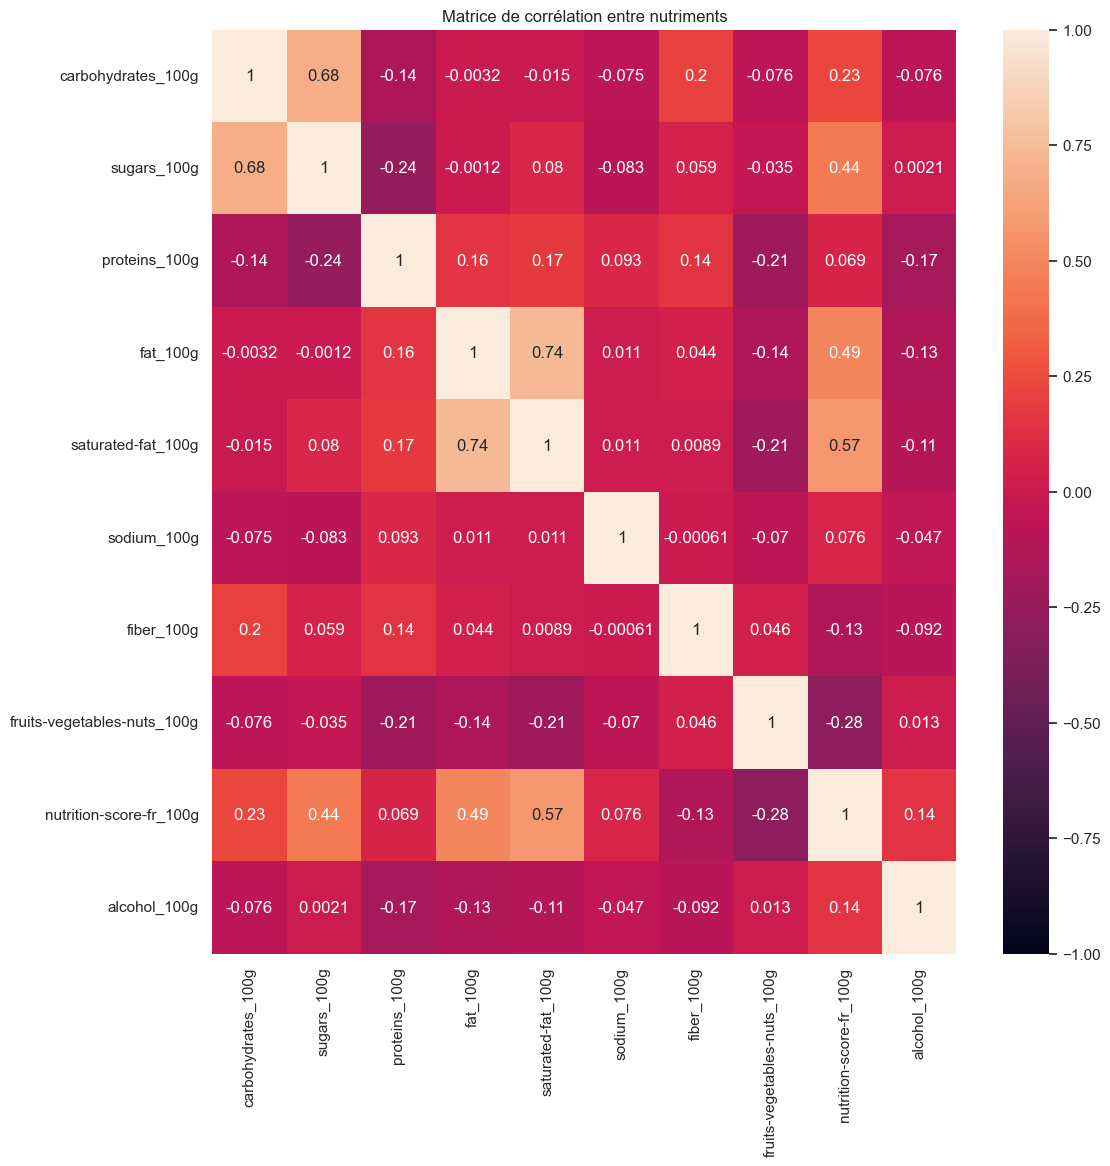

In [61]:
data = final_foods[['carbohydrates_100g', 'sugars_100g', 'proteins_100g', 'fat_100g', 'saturated-fat_100g', 'sodium_100g', 'fiber_100g', 'fruits-vegetables-nuts_100g', 'nutrition-score-fr_100g', 'alcohol_100g']]
fig = plt.figure(1, figsize=(12, 12))
sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True)
plt.title('Matrice de corrélation entre nutriments')
plt.show()

On voit que les nutriments qui ont le plus d'influence sur le Nutri-Score sont carbohydrates_100g, sugars_100g, fat_100g, saturated-fat_100g, fruits-vegetables-nuts_100g et fiber_100g.

#### 2.2.2. Variable qualitative vs variable quantitative par ANOVA

Voici une représentation du Nutri-Grade par rapport à chaque quantité en nutriments pour 100g de produits rentrant dans le calcul du Nutri-Score ainsi que le Nutri-Score directement.

L'ANOVA est une modélisation qui essaie d'expliquer les variations de la variable quantitative en fonction des modalités de la variable qualitative.

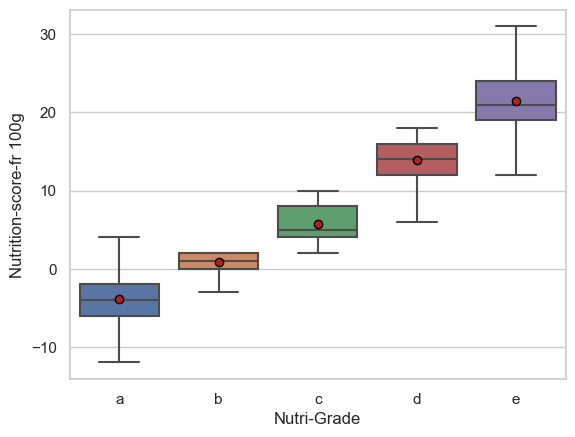

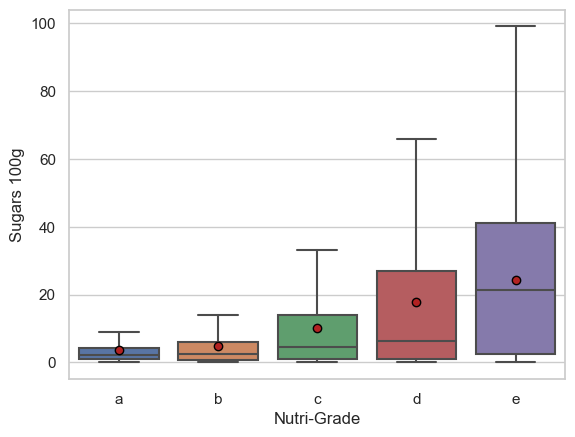

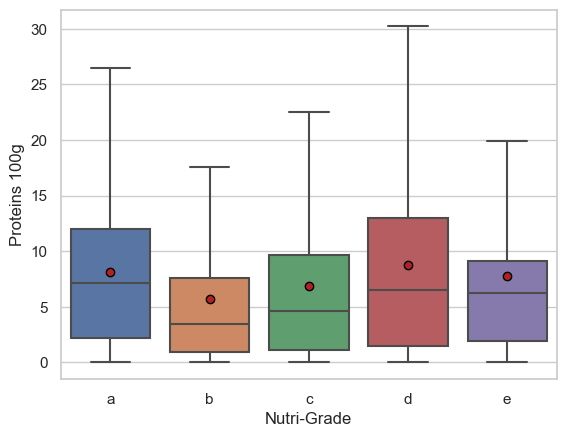

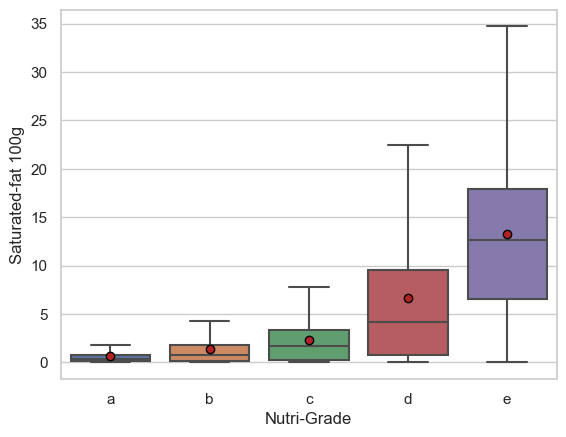

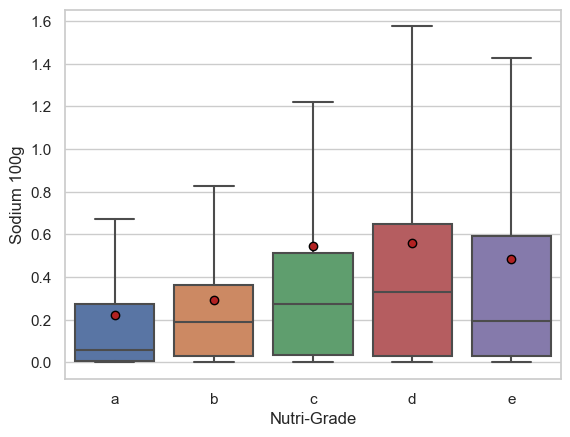

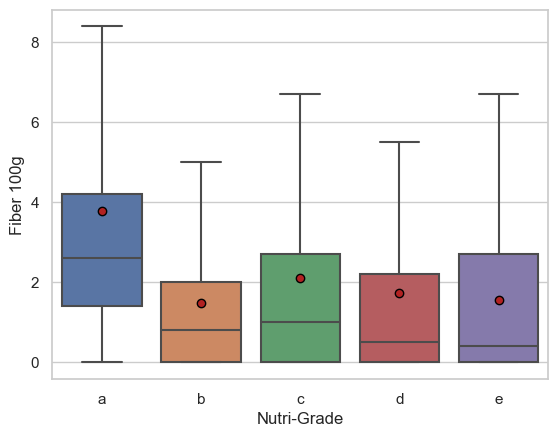

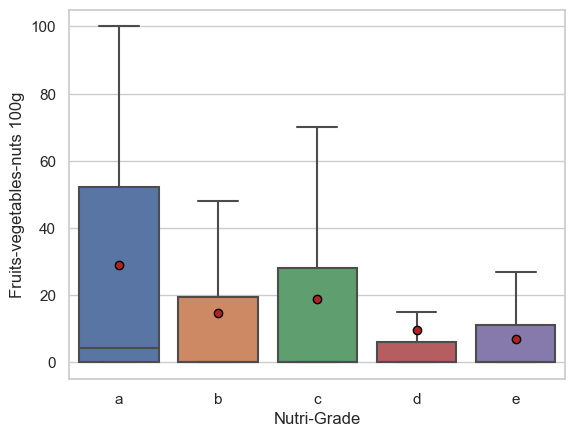

In [62]:
nutriments = ['nutrition-score-fr_100g', 'sugars_100g', 'proteins_100g', 'saturated-fat_100g', 'sodium_100g', 'fiber_100g', 'fruits-vegetables-nuts_100g'] 
order = sorted(final_foods["nutrition_grade_fr"].unique())
y_pos = np.arange(len(labels))
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
for n in nutriments :
    sns.set_style("whitegrid")
    sns.boxplot(data=final_foods, x='nutrition_grade_fr', y=n, order=order, showfliers=False, showmeans=True, meanprops=meanprops)
    plt.ylabel(n.replace("_", " ").capitalize())
    plt.xlabel("Nutri-Grade")
    plt.show()

<div class="alert alert-block alert-info"> <b>Note:</b> Les points rouges au milieu de chaque boîte à moustaches représentent la moyenne des valeurs. </div>

On peut voir par exemple que plus le Nutri-Grade est mauvais, plus la quantité de sugars_100g est dispersée. Pareil pour les saturated-fat_100g bien que ceux-ci ont un taux plus élevés pour les plus mauvais Nutri-Grades.
Pour les fruits-vegetables-nuts_100g, on observe une forte dispersion pour le Nutri-Grade A. Et même si la dispersion est équivalente entre chaque Nutri-Grade pour les fibres, leur taux est plus important pour le Nutri-Grade A.

Mais vérifions maintenant ces affirmations par les chiffres, on va calculer le rapport de corrélation η2 pour chaque variable quantitative. (plus il est proche de 0 moins la relation entre X et Y est elevée et inversement avec 1).

In [63]:
def get_eta_squared(x,y):
    y_mean = y.mean()
    classes = []
    for klass in x.unique():
        yi_klass = y[x==klass]
        classes.append({'ni': len(yi_klass),
                        'klass_mean': yi_klass.mean()})
    SCT = sum([(yj-y_mean)**2 for yj in y])
    SCE = sum([c['ni']*(c['klass_mean']-y_mean)**2 for c in classes])
    return SCE/SCT

In [64]:
X = "nutrition_grade_fr"

for Y in nutriments:
    eta_squared = get_eta_squared(final_foods[X],final_foods[Y])
    print("Le rapport de corrélation η2 entre le Nutri-Grade et {} est de {}".format(Y, eta_squared))

Le rapport de corrélation η2 entre le Nutri-Grade et nutrition-score-fr_100g est de 0.9137250888981414
Le rapport de corrélation η2 entre le Nutri-Grade et sugars_100g est de 0.16432625783486257
Le rapport de corrélation η2 entre le Nutri-Grade et proteins_100g est de 0.01725756980277025
Le rapport de corrélation η2 entre le Nutri-Grade et saturated-fat_100g est de 0.3021706398327988
Le rapport de corrélation η2 entre le Nutri-Grade et sodium_100g est de 0.006497059659143466
Le rapport de corrélation η2 entre le Nutri-Grade et fiber_100g est de 0.04312282165413962
Le rapport de corrélation η2 entre le Nutri-Grade et fruits-vegetables-nuts_100g est de 0.07354023087599385


Hormis sugars_100g à 0.16 et saturated-fat_100g à 0.30, le Nutri-Grade ne semble pas être en relation directe avec chacun des autres nutriments.

Pour ce qui est du Nutri-Score, il y a une très forte relation entre lui et le Nutri-Grade. C'est logique le Nutri-Grade étant déterminé selon la valeur du Nutri-Score.

### 2.3. Analyse multivariée

Je vais maintenant étudier notre jeu de données grâce à l'analyse en composantes principales ACP.
Grâce à l'analyse en composantes principales, je vais pouvoir vérifier les liaisons entre les différentes variables et étudier la variabilité entre les individus pour voir leur ressemblance et leur différences.

#### 2.3.1. Liaisons entre les variables

La première étape ici est de créer un diagramme des éboulis des valeurs propres avec somme cumulée afin de voir le nombre de plans sur lequel on va travailler.
La seconde, en fonction du nombre de plan choisi, est de créer des cercles de corrélations pour voir comment regrouper certaines variables entre elles.

In [65]:
# Keeping only numerical values of dataframe
X = final_foods.select_dtypes(include=[np.number])

In [66]:
scaler = StandardScaler()
# Fiting and training
X_scaled = scaler.fit_transform(X)

In [67]:
# Instanciate ACP
pca = PCA(svd_solver='full').fit(X_scaled)
# Training ACP
X_projected = pca.transform(X_scaled)

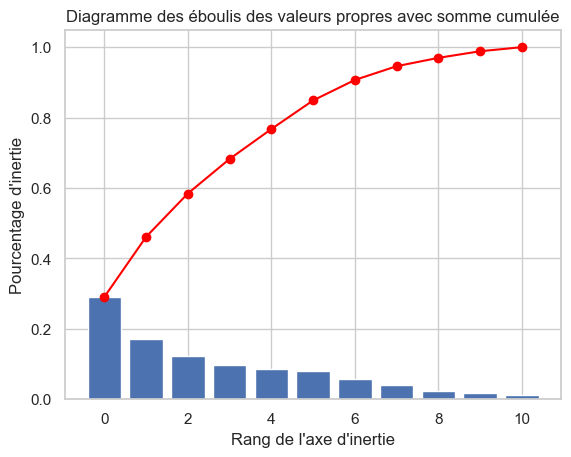

In [68]:
# Explained variance
explained_variance = pca.explained_variance_ratio_

# Scree plot
plt.figure()
plt.bar(np.arange(len(explained_variance)), explained_variance)
plt.plot(np.arange(len(explained_variance)), explained_variance.cumsum(),c="red",marker='o')
plt.xlabel("Rang de l'axe d'inertie")
plt.ylabel("Pourcentage d'inertie")
plt.title("Diagramme des éboulis des valeurs propres avec somme cumulée")
plt.show()

In [69]:
f1 = np.round(explained_variance[0] * 100, 2)
f2 = np.round(explained_variance[1] * 100, 2)
print("{}% de l’inertie totale est associée à F1, et {}% à F2, le premier plan factoriel représente {}% de l’inertie totale.".format(f1, f2, (f1 + f2))) 

f3 = np.round(explained_variance[2] * 100, 2)
f4 = np.round(explained_variance[3] * 100, 2)
print("{}% de l’inertie totale est associée à F3, et {}% à F4, le second plan factoriel représente {}% de l’inertie totale.".format(f3, f4, (f3 + f4)))

print("Les deux premiers plans représentent {}% de l'inertie totale".format((f1+f2+f3+f4)))

29.03% de l’inertie totale est associée à F1, et 17.07% à F2, le premier plan factoriel représente 46.1% de l’inertie totale.
12.32% de l’inertie totale est associée à F3, et 9.82% à F4, le second plan factoriel représente 22.14% de l’inertie totale.
Les deux premiers plans représentent 68.24000000000001% de l'inertie totale


In [70]:
# Weights of principal components
pcs = pca.components_

In [71]:
# rows
n = X.shape[0]
# variables
p = X.shape[1]
# amount of variance explained by each of the selected components
eigval = (n-1) / n * pca.explained_variance_
sqrt_eigval = np.sqrt(eigval)
# empty coordinates matrix
corvar = np.zeros((p,p))
# fill matrix
for k in range(p):
    corvar[:,k] = pcs[k,:] * sqrt_eigval[k]
# transform in dataframe
f1_f2 = pd.DataFrame({'id': X.columns, 'F1': corvar[:,0], 'F2': corvar[:,1]})
f1_f2

,id,F1,F2
0,nutrition-score-fr_100g,0.778804,-0.077410
1,energy_100g,0.897590,-0.034083
2,carbohydrates_100g,0.414145,-0.765221
3,sugars_100g,0.433860,-0.787726
4,proteins_100g,0.217363,0.540318
5,fat_100g,0.773075,0.371118
6,saturated-fat_100g,0.774389,0.349794
7,sodium_100g,0.019652,0.221854
8,fiber_100g,0.126620,-0.111570
9,fruits-vegetables-nuts_100g,-0.376069,-0.168032


In [72]:
def create_correlation_circle(df, a, b, va, vb):
    fig, ax = plt.subplots(figsize=(10,10))
    fig.suptitle("Cercle des corrélations ({} et {})".format(a, b))
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)
    # Adding axes
    ax.axvline(x = 0, color = 'black', linestyle = '--', linewidth = 1)
    ax.axhline(y = 0, color = 'black', linestyle = '--', linewidth = 1)
    plt.xlabel("{} ({}%)".format(a, va))
    plt.ylabel("{} ({}%)".format(b, vb))
    # Variables names ans arrows
    for j in range(p):
        ax.text(df[a][j], df[b][j], df["id"][j])
        plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                           df[a][j],df[b][j], 
                           angles='xy', scale_units='xy', scale=1, 
                           color="blue", linewidth=1)
    # Circle
    plt.gca().add_artist(plt.Circle((0,0),1,color='black',fill=False))

    plt.show()

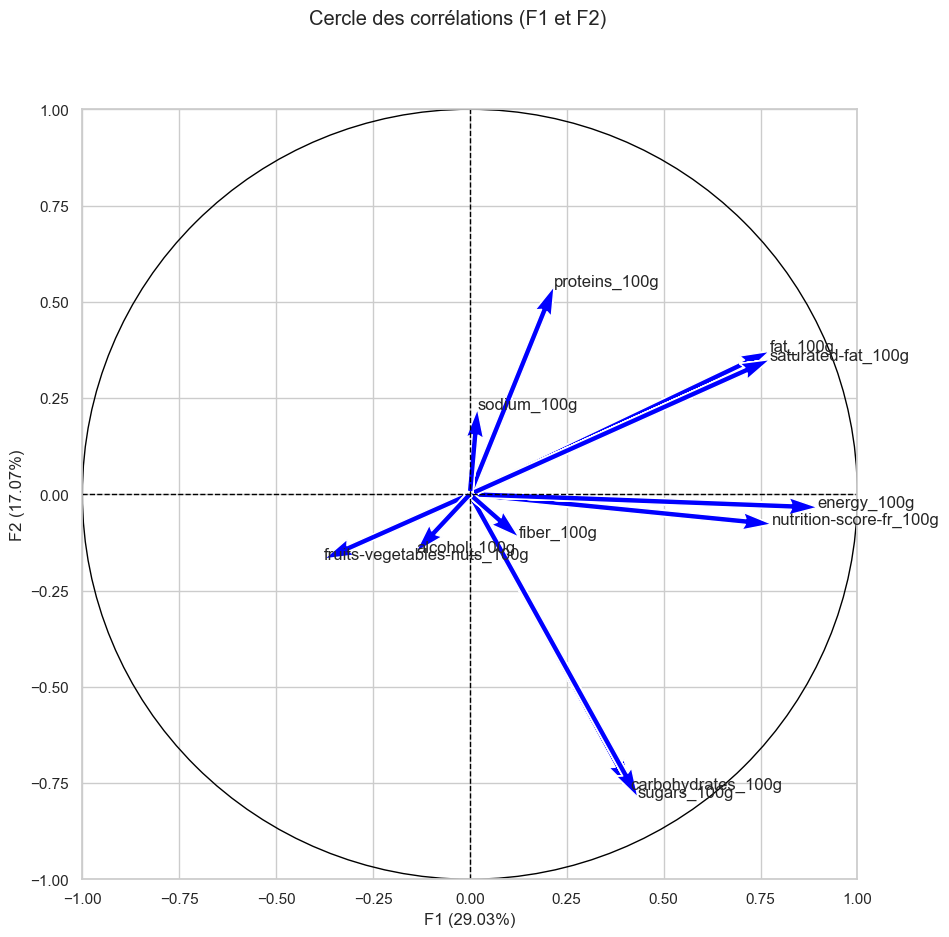

In [73]:
create_correlation_circle(f1_f2, "F1", "F2", f1, f2)

Les variables les plus corrélées à F1 sont :
* energie_100g
* fat_100g
* saturated-fat_100g

On sait que les graisses sont les nutriments qui apportent le plus de calories.

<div class="alert alert-block alert-info"> On peut interpréter F1 comme l'apport calorique</div>

Les variables les plus corrélées à F2 sont :
* carbohydrates_100g (avec une corrélation négative)
* sugar_100g (avec une corrélation négative)

J'aurai pu retenir proteins_100g mais sa flèche est un peu plus petite que celle de carbohydrates_100g et de sugar_100g. Et il est difficile de faire un rapprochement entre proteins_100g et les deux autres.

<div class="alert alert-block alert-info"> On peut interpréter F2 comme la teneur globale en glucides</div>

In [74]:
f3_f4 = pd.DataFrame({'id': X.columns, 'F3': corvar[:,2], 'F4': corvar[:,3]})
f3_f4

,id,F3,F4
0,nutrition-score-fr_100g,-0.407485,0.132562
1,energy_100g,0.185184,-0.060850
2,carbohydrates_100g,0.258234,0.137940
3,sugars_100g,-0.039751,0.101799
4,proteins_100g,0.402204,0.283890
5,fat_100g,-0.069118,-0.322904
6,saturated-fat_100g,-0.155275,-0.232630
7,sodium_100g,0.020830,0.643636
8,fiber_100g,0.717094,-0.082498
9,fruits-vegetables-nuts_100g,0.076682,-0.602605


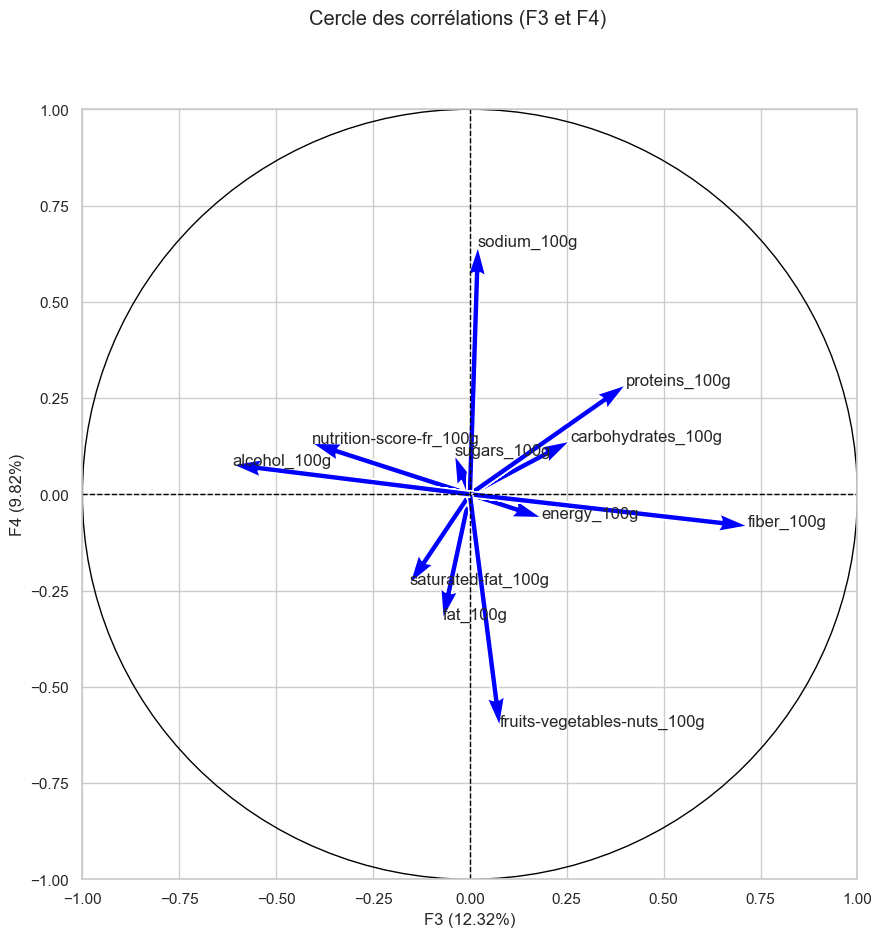

In [75]:
create_correlation_circle(f3_f4, "F3", "F4", f3, f4)

La variable la plus corrélée à F3 est :
* fiber_100g

<div class="alert alert-block alert-info"> On peut interpréter F3 comme la teneur en fibres</div>

Les variables les plus corrélées à F4 sont :
* sodium_100g
* fruits-vegetables-nuts_100g (avec une corrélation négative)

On sait que les fruits et les légumes sont des aliments riches en eau et donc pauvres en sodium.

<div class="alert alert-block alert-info"> On peut interpréter F4 comme la teneur en sel</div>

#### 2.3.2. Variabilité des individus

Le but ici est de représenter les individus avec leur Nutri-Grade sur les plans factoriels obtenus précédemment et de voir leur corrélation avec les variables obtenues.

In [76]:
# Create dataframe from F1 and F2 value with Nutri-Grade
f1_f2_pca_df = pd.DataFrame({
    "F1 (apport énergétique)" : X_projected[:,0], 
    "F2 (glucides)" : X_projected[:,1],
    "Nutri-Grade" : final_foods["nutrition_grade_fr"]
})
f1_f2_pca_df.head()

,F1 (apport énergétique),F2 (glucides),Nutri-Grade
138,-0.050815,-1.131169,a
774,-1.818305,0.171837,c
11100,-1.550641,-0.570104,d
11299,0.312721,1.264509,a
11745,-0.449070,-1.106254,e


In [77]:
def create_factorial_plane(df, x, y):
    palette = {'a': '#038141', 'b': '#85bb2f',
                     'c': '#fecb02', 'd': '#ee8100', 'e': '#e63e11'}
    hue_order = ['a', 'b', 'c', 'd', 'e']
    plt.figure(figsize=(10,10))

    ax = sns.scatterplot(data=df, 
                    x=x, 
                    y=y, 
                    hue="Nutri-Grade",
                    hue_order=hue_order,
                    palette=palette)

    ax.axvline(x = 0, color = 'black', linestyle = '--', linewidth = 1)
    ax.axhline(y = 0, color = 'black', linestyle = '--', linewidth = 1)

    plt.title("Projection des individus sur {} et {}".format(x, y))
    plt.xlabel(x)
    plt.ylabel(y)

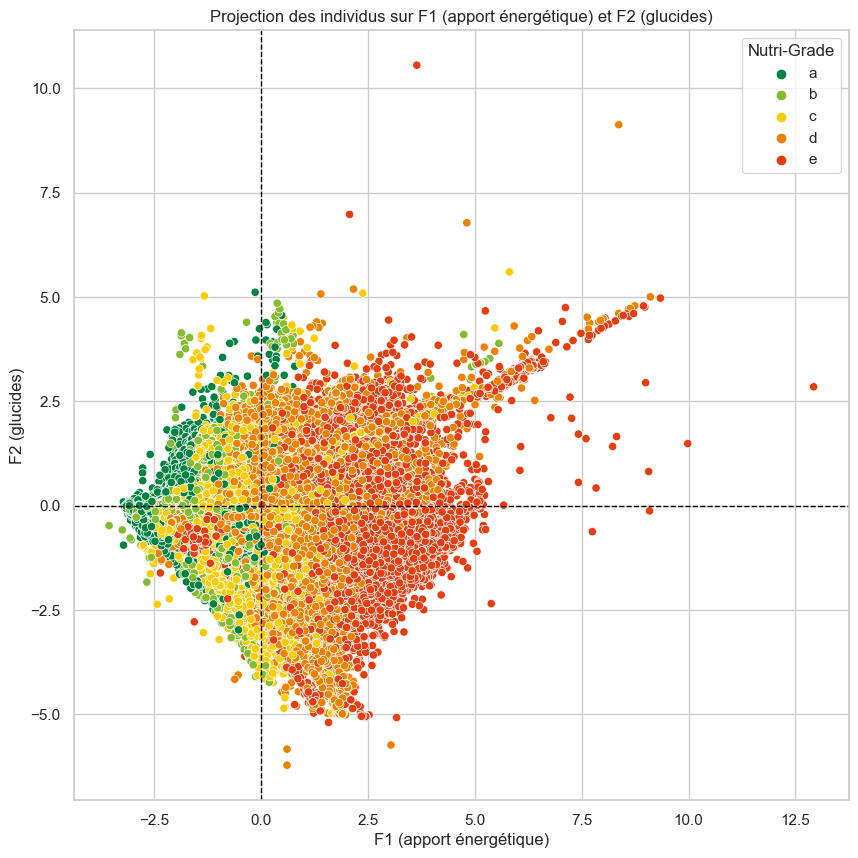

In [78]:
create_factorial_plane(f1_f2_pca_df, "F1 (apport énergétique)", "F2 (glucides)")

On voit que plus l'apport calorique du produit est important, plus son Nutri-Grade est mauvais et que moins le produit contient de glucides (F2 > 0), plus le Nutri-Grade est bon.

In [79]:
# Create dataframe from F3 and F4 value with Nutri-Grade
f3_f4_pca_df = pd.DataFrame({
    "F3 (fibres)" : X_projected[:,2], 
    "F4 (sel)" : X_projected[:,3],
    "Nutri-Grade" : final_foods["nutrition_grade_fr"]
})
f3_f4_pca_df.head()

,F3 (fibres),F4 (sel),Nutri-Grade
138,1.704284,0.355897,a
774,-0.658326,0.134718,c
11100,-2.845818,0.383826,d
11299,2.736006,-2.752396,a
11745,-2.511868,0.790822,e


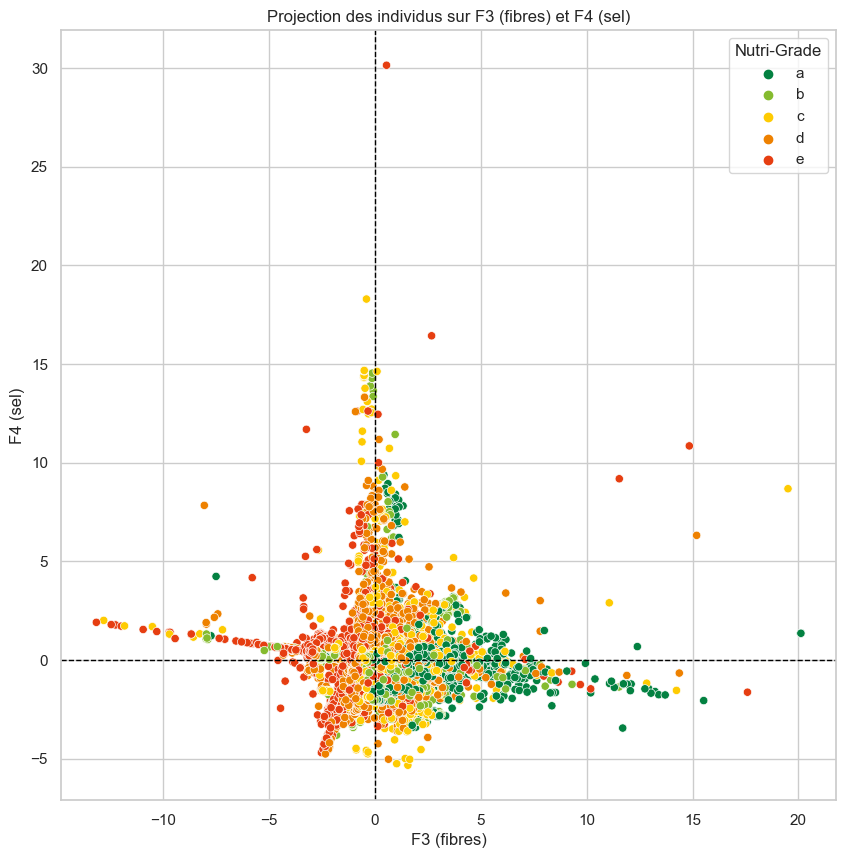

In [80]:
create_factorial_plane(f3_f4_pca_df, "F3 (fibres)", "F4 (sel)")

On voit que plus il y a de fibres dans le produit, plus son Nutri-Grade est bon et que plus il y a de sel dans le produit, plus son Nutri-Grade est mauvais.

## 3. Rappel sur le RGPD

RGPD = Règlement Général sur la Protection des Données. Il concerne les données personnelles et leur traitement.

<b>Quels sont les grands principes des règles de protection des données personnelles ?</b>

Les 5 grands principes des règles de protection des données personnelles sont les suivants :
* Le principe de finalité : le responsable d'un fichier ne peut enregistrer et utiliser des informations sur des personnes physiques que dans un but bien précis, légal et légitime ;
* Le principe de proportionnalité et de pertinence : les informations enregistrées doivent être pertinentes et strictement nécessaires au regard de la finalité du fichier ;
* Le principe d'une durée de conservation limitée : il n'est pas possible de conserver des informations sur des personnes physiques dans un fichier pour une durée indéfinie. Une durée de conservation précise doit être fixée, en fonction du type d'information enregistrée et de la finalité du fichier ;
* Le principe de sécurité et de confidentialité : le responsable du fichier doit garantir la sécurité des informations qu'il détient. Il doit en particulier veiller à ce que seules les personnes autorisées aient accès à ces informations ;
* Les droits des personnes.

Dans le cadre de cette étude, aucune donnée personnelle n'a été utilisée et aucune donnée personnelle n'aura a être utilisée dans l'application à mettre en place chez Santé Publique France.